**1. 프로젝트 개요<br>
&nbsp;1.1 프로젝트 목표<br>
&nbsp;1.2. 분석데이터<br>**
<br>
**2.데이터전처리<br>
&nbsp;2.1. 데이터클렌징<br>
&nbsp;&nbsp;2.1.1. 데이터 결측치 처리<br>
&nbsp;&nbsp;2.1.2. 데이터 이상치 처리<br>
&nbsp;2.2. 데이터변환<br>
<br>
3.EDA<br>
&nbsp;3.1. EDA목표<br>
&nbsp;3.2. EDA분석<br>
&nbsp;&nbsp;3.2.1.데이터 분포 확인<br>
&nbsp;&nbsp;3.2.2.데이터간 상관관계를 포함한 데이터 특성 확인<br>
&nbsp;&nbsp;3.2.3.목표변수와의 상관관계 확인<br>
&nbsp;3.3. EDA결론<br>
&nbsp;&nbsp;3.3.1. EDA정리<br>
&nbsp;&nbsp;3.3.2. 가설수립<br>
&nbsp;&nbsp;3.3.3. 분석방법설정<br>**
<br>
**4.모델링 및 검증<br>
&nbsp;4.1. 모델수립<br>
&nbsp;4.2. 모델평가<br>**
<br>
**5. 최종결론**

# 1. 프로젝트 개요
## 1.1 프로젝트 목표
**모두의 주차장 어플 이용자의 일 단위 이용 건수 예측(예측기간 : 2020.10.01~2020.12.31)<br>**
**모두의 주차장 어플 이용자별 1달 단위 향후 이용 건수 예측(예측기간 : 2020.10.01~2020.12.31)**
## 1.2 분석데이터
**(1). 실전db.csv<br>
(2). 서울시_기상데이터.csv<br>**

# 2. 데이터전처리
## 2.1. 데이터클렌징
### 2.1.1. 데이터 결측치 처리

In [1]:
#EDA관련 패키지 구성 및 디스플레이 설정
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from IPython.display import set_matplotlib_formats
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
set_matplotlib_formats('retina')
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#RandomForestRegressor 관련 패키지 구성
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
df_ori = pd.read_csv('./data/실전db.csv', encoding='cp949')
df_ori.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


In [3]:
#원본 데이터 변경을 막기위해 데이터프레임 변경
df=df_ori.copy()
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [4]:
#데이터 정보 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB
None


> **1. USER_ID : 정수형<br>
2. JOIN_DATE : 범주형(문자형)<br>
3. D_TYPE : 범주형(문자형)<br>
4. STORE_ID : 정수형<br>
5. GOODS_TYPE : 범주형(문자형)<br>
6. DATE : 범주형(문자형)<br>
7. <목표변수> COUNT : 정수형<br>
8. AD1 : 범주형(문자형)**

In [5]:
#데이터 결측치 확인
df.isnull()
df.isnull().sum()

USER_ID       0
JOIN_DATE     0
D_TYPE        0
STORE_ID      0
GOODS_TYPE    0
DATE          0
COUNT         0
AD1           0
dtype: int64

> **데이터셋의 결측치는 존재하지 않음**

### 2.1.2. 데이터 이상치 처리

>**프로젝트의 목표(일반 이용자의 한달 사용 건수 예측)를 고려해 일반적인 이용자로 보이지 않는 데이터를 이상치로 판단**
> **다음 조건에 해당하는 이용자는 이상치로 처리<br>
-연속적으로 이용<br>
-데이터가 5개 이상<br>
-AD1이 계속해서 바뀜<br>
-COUNT 값의 평균이 비정상적으로 높음**

In [6]:
#이용자 이상치 선별
df_outlier = df.query("COUNT > 10")

In [7]:
#USER_ID=999665 인 이용자에 대한 처리
df=df[df['USER_ID']!=999665]

In [8]:
#이상치가 존재할 가능성이 있는 시계열 데이터컬럼의 타입을 Datetime으로 바꿔줌
#JOIN_DATE, DATE
df['JOIN_DATE']=pd.to_datetime(df['JOIN_DATE'],format='%Y-%m-%d')
df['DATE']=pd.to_datetime(df['DATE'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878905 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   USER_ID     878905 non-null  int64         
 1   JOIN_DATE   878905 non-null  datetime64[ns]
 2   D_TYPE      878905 non-null  object        
 3   STORE_ID    878905 non-null  int64         
 4   GOODS_TYPE  878905 non-null  object        
 5   DATE        878905 non-null  datetime64[ns]
 6   COUNT       878905 non-null  int64         
 7   AD1         878905 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 60.3+ MB


In [9]:
# df[['COUNT']].value_counts()

In [10]:
#전체 데이터의 개수
df.count()

USER_ID       878905
JOIN_DATE     878905
D_TYPE        878905
STORE_ID      878905
GOODS_TYPE    878905
DATE          878905
COUNT         878905
AD1           878905
dtype: int64

In [11]:
#COUNT가 1 또는 2가 아닌 데이터의 개수
df_not12=df[df['COUNT']!=1]
df_not12=df_not12[df_not12['COUNT']!=2]
df_not12.count()

USER_ID       1611
JOIN_DATE     1611
D_TYPE        1611
STORE_ID      1611
GOODS_TYPE    1611
DATE          1611
COUNT         1611
AD1           1611
dtype: int64

>**count가 대부분 1,2에 몰려있는 데이터<br>
1,2가 아닌 값은 전체 데이터의 0.2%가량에 불과**

<AxesSubplot:>

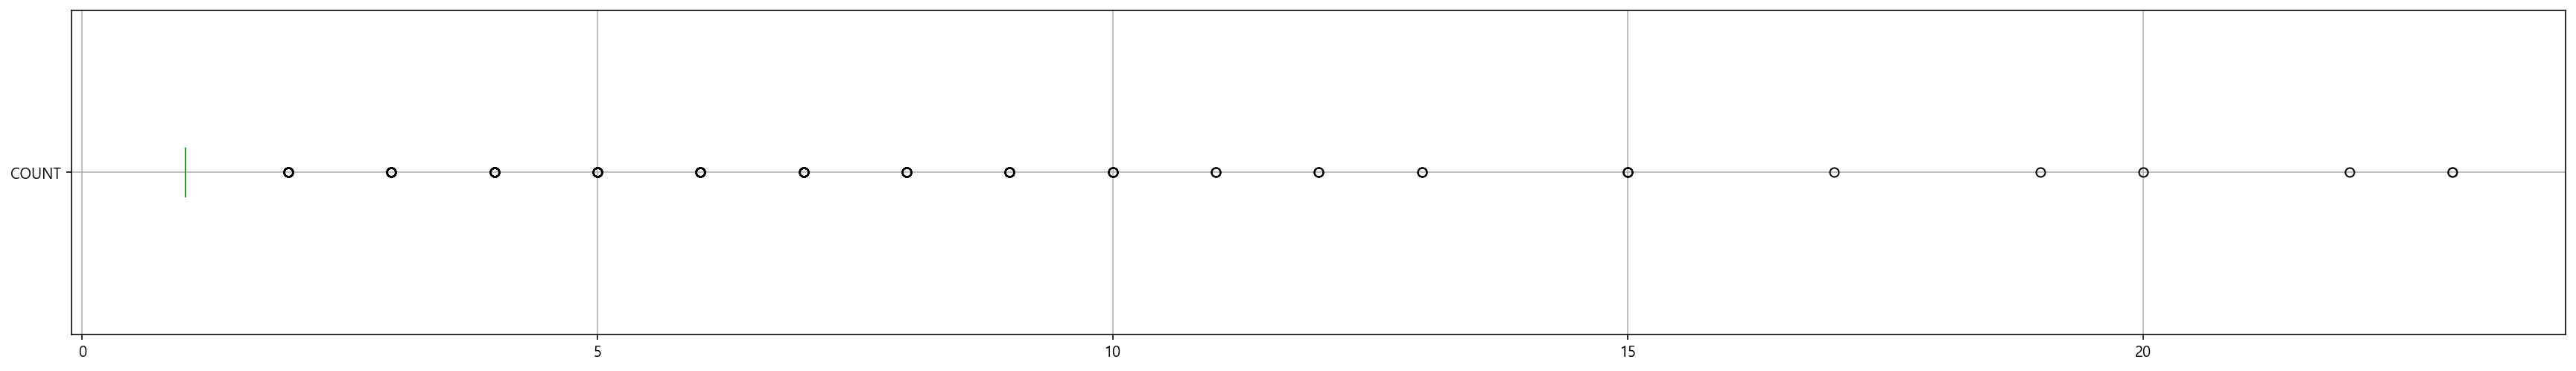

In [12]:
#COUNT, JOIN_DATE, DATE 컬럼에 대하여 이상치 분석
#COUNT 컬럼 이상치 분석
df[['COUNT']].boxplot(figsize=(30,4),vert=0)

<AxesSubplot:>

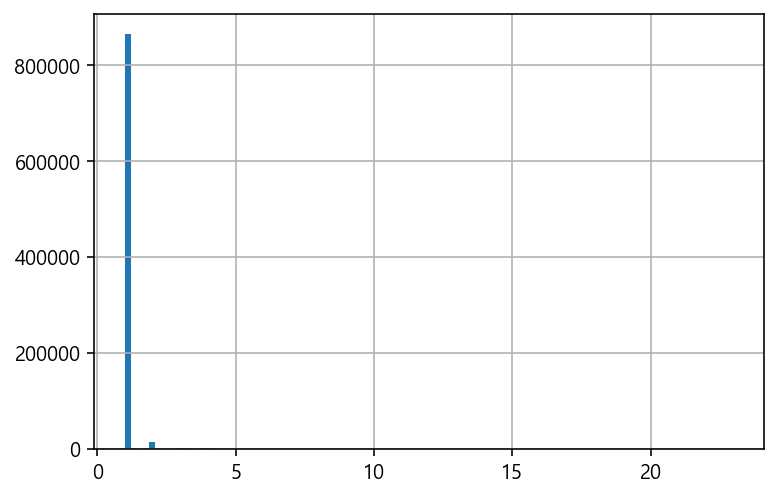

In [13]:
#COUNT, JOIN_DATE, DATE 컬럼에 대하여 이상치 분석
#COUNT 컬럼 이상치 분석
df['COUNT'].hist(bins=100)

>**count가 대부분 1,2에 몰려있는 데이터<br>
다른 값들도 단순히 당일 사용한 횟수를 의미하기 때문에 이상치라고 판단하기 힘듬**

<AxesSubplot:>

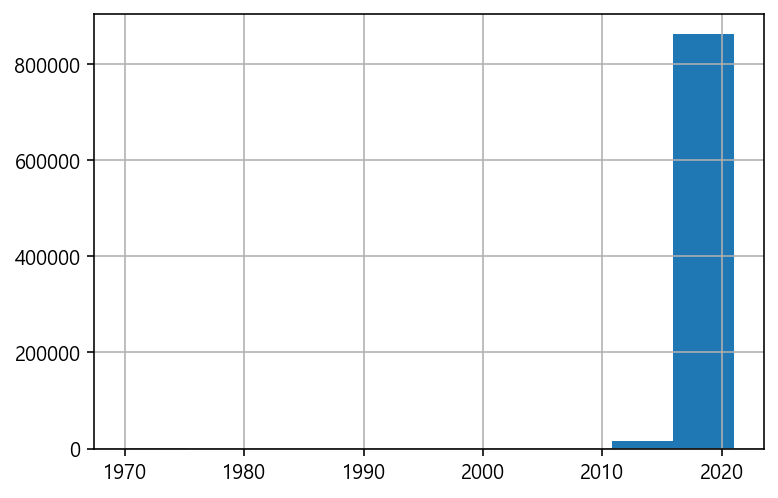

In [14]:
#COUNT, JOIN_DATE, DATE 컬럼에 대하여 이상치 분석
#JOIN_DATE 컬럼 이상치 분석
df['JOIN_DATE'].hist()

In [15]:
df_wrongjoindate=df[df['JOIN_DATE']<='2013-08-01']
df_wrongjoindate

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
437,1081430,1970-01-01,CC,90070,A,2020-01-01,1,GD
2196,1410151,1970-01-01,CC,92437,B,2020-01-02,1,J
2204,1415023,1970-01-01,CC,131081,A,2020-01-02,1,YO
2434,125582,1970-01-01,CC,91885,A,2020-01-03,1,YD
2645,602188,1970-01-01,CC,2334,B,2020-01-03,1,MP
...,...,...,...,...,...,...,...,...
866536,1723400,1970-01-01,CC,190188,A,2020-12-26,1,JR
867913,1723400,1970-01-01,CC,190188,A,2020-12-27,1,JR
868210,1825656,1970-01-01,CC,219936,A,2020-12-27,1,YD
873707,1828010,1970-01-01,CC,220635,C,2020-12-29,1,GN


AxesSubplot(0.125,0.125;0.775x0.755)
1970-01-01 00:00:00
1970-01-01 00:00:00


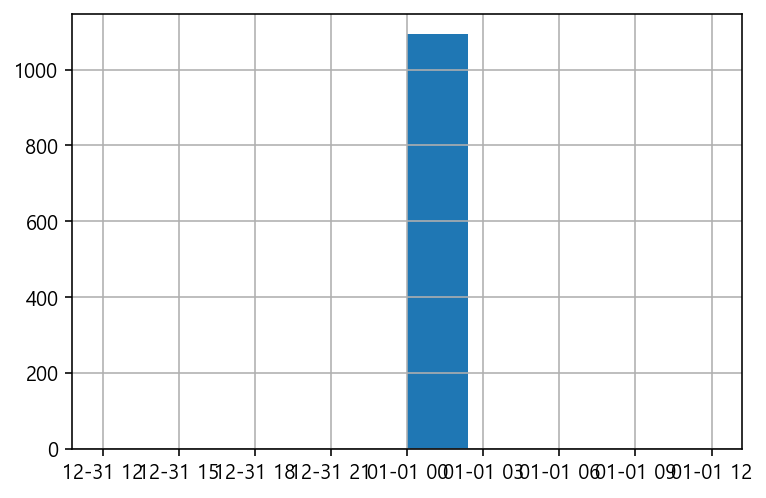

In [16]:
print(df_wrongjoindate['JOIN_DATE'].hist())
print(df_wrongjoindate['JOIN_DATE'].min())
print(df_wrongjoindate['JOIN_DATE'].max())

>**모두의 주차장이 2013년 8월에 서비스를 시작했다는 것을 고려할때 이전의 데이터(전부 1970-01-01 데이터)는 오기입 등의 문제가 있는 잘못된 데이터일 확률이 높음**<br>
**오류값으로 추정되었던 1970년도 가입데이터는 어떤 실험데이터가 아니었을까? 특정 COUNT분포를 보여주지 않을까?**

In [17]:
df_1970=df[df['JOIN_DATE']=='1970-01-01']
df_1970['COUNT'].value_counts()

1    1071
2      19
3       2
4       1
Name: COUNT, dtype: int64

>**(COUNT가1,2가 아닌데이터)/(전체데이터) 비율이 0.2%로 특이한 분포를 보여주고있지는 않음<br>
단순 기입 오류일 수 있음**

In [18]:
#COUNT, JOIN_DATE, DATE 컬럼에 대하여 이상치 분석
#JDATE 컬럼 이상치 분석
date_exploration=df['DATE']
date_exploration.drop_duplicates(inplace=True)
date_exploration.describe()

count                     366
unique                    366
top       2020-03-13 00:00:00
freq                        1
first     2020-01-01 00:00:00
last      2020-12-31 00:00:00
Name: DATE, dtype: object

<AxesSubplot:>

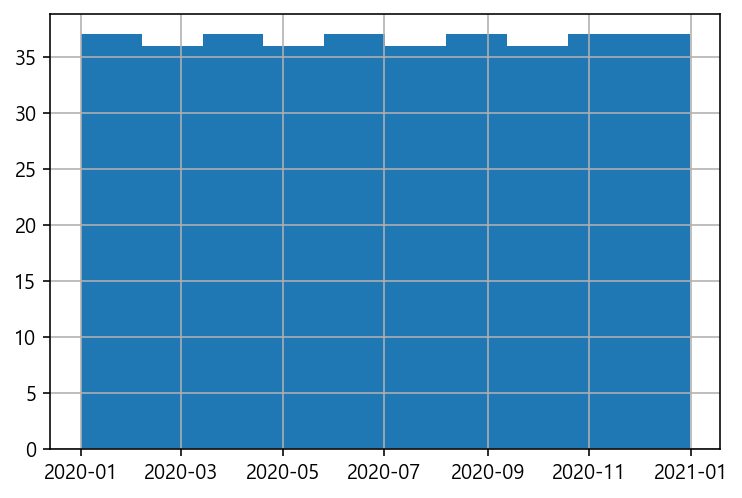

In [19]:
date_exploration.hist()

>**2020년 총 366일, DATE 컬럼은 2020년의 모든 날짜에 대응하는 데이터행을 최소 하나 이상 가지고 있음**

### 2.1.3. 데이터변환<br>

> **1. USER_ID : 정수형<br>
2. JOIN_DATE : 범주형(문자형)<br>
3. D_TYPE : 범주형(문자형)<br>
4. STORE_ID : 정수형<br>
5. GOODS_TYPE : 범주형(문자형)<br>
6. DATE : 범주형(문자형)<br>
7. <목표변수> COUNT : 정수형<br>
8. AD1 : 범주형(문자형)**

>**연속형 설명변수가 없는 관계로 현단계(데이터탐색단계)에서는 스케일링작업(표준화 및 정규화)은 필요없다고 판단됨<br>**

# 3. EDA
## 3.1. EDA목표
**(1).데이터의 분포 확인<br>
(2).데이터의 특성 확인<br>
(3).데이터 내 설명변수와 목표변수와의 관계를 중심으로 상관관계 확인**
## 3.2. EDA분석
### 3.2.1. 데이터 분포 확인

In [20]:
df_yearc=df.copy()
df_yearc.JOIN_DATE = pd.to_datetime(df_yearc.JOIN_DATE) 
df_yearc.DATE = pd.to_datetime(df_yearc.DATE)
df_yearc.JOIN_DATE = df_yearc.JOIN_DATE.dt.to_period(freq="A") # 나중에 원핫인코딩으로 바꾸자.
df_yearc.JOIN_DATE = df_yearc.JOIN_DATE.astype(str)
df_yearc["MONTH"] = df_yearc.DATE.dt.strftime('%m')

In [21]:
#USER_ID 컬럼 분포 확인
df_utype_count=df['USER_ID'].value_counts()
print(df_utype_count)

591610     244
1355841    235
1365069    222
1224426    222
1407916    222
          ... 
586251       1
1575444      1
1573397      1
1591836      1
30735        1
Name: USER_ID, Length: 165424, dtype: int64


> **특정 주 사용 유저들이 존재한다는 사실을 알 수 있음**

AA    493166
BB    384541
CC      1198
Name: D_TYPE, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


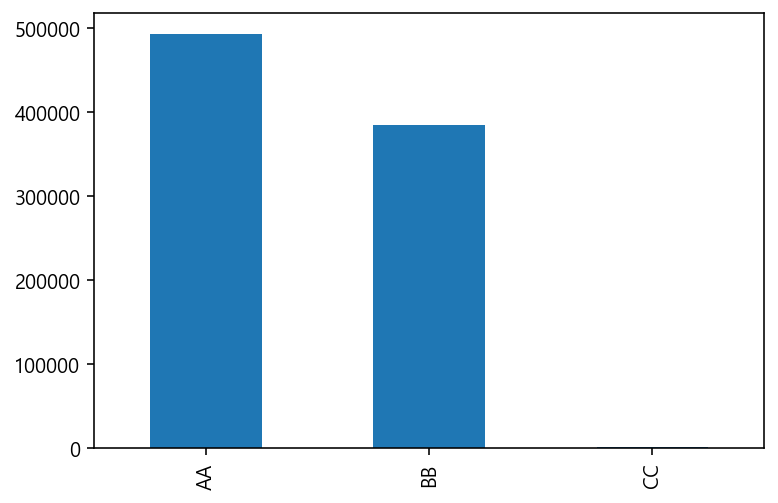

In [22]:
#D_TYPE 컬럼 분포 확인
df_dtype_count=df['D_TYPE'].value_counts()
print(df_dtype_count)
print(df_dtype_count.plot.bar())

> **D_TYPE이 CC인 유저는 수가 다른 두가지 D_TYPE에 비해 압도적으로 적음**

220557    17613
220893    17216
220655    16274
220848    15935
92437     15857
          ...  
231127        1
231128        1
225653        1
223093        1
225629        1
Name: STORE_ID, Length: 1060, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


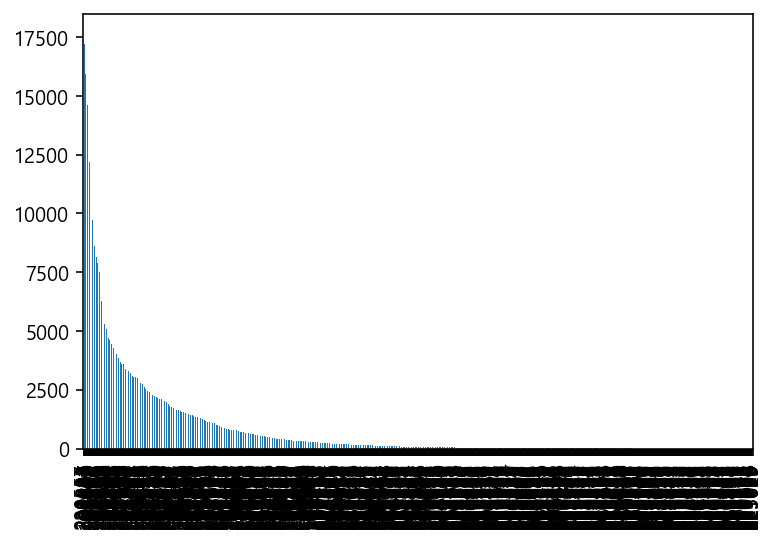

In [23]:
#STORE_ID 컬럼 분포 확인
df_stype_count=df['STORE_ID'].value_counts()
print(df_stype_count)
print(df_stype_count.plot.bar())

> **STORE별로 이용 횟수 차이가 크게 난다는 사실을 알 수 있음**

A    609494
C    131108
B    118541
D     19762
Name: GOODS_TYPE, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


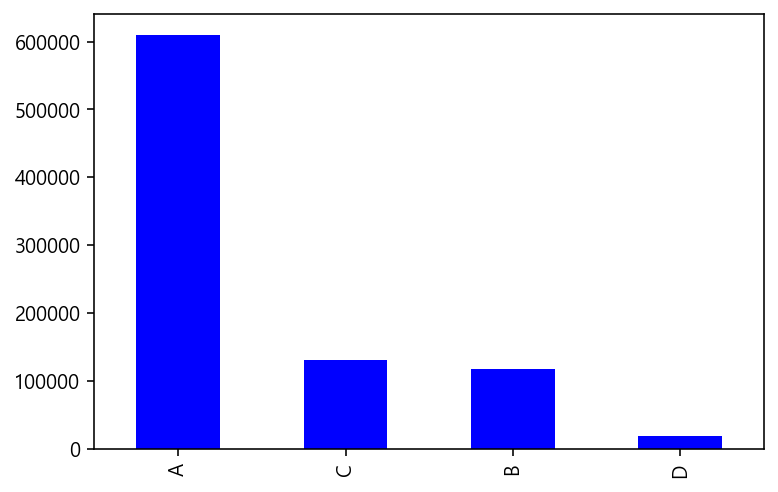

In [24]:
#GOODS_TYPE 컬럼 분포 확인
df_gtype_count=df['GOODS_TYPE'].value_counts()
print(df_gtype_count)
print(df_gtype_count.plot.bar(color='blue'))

> **GOODS_TYPE은 A의 사용이 다른 타입보다 압도적으로 많다는 사실을 알 수 있음**

J      179291
GN     172906
JRR    126538
SC      75810
MP      67803
        ...  
SP          3
VO          1
GR          1
NW          1
ADS         1
Name: AD1, Length: 84, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


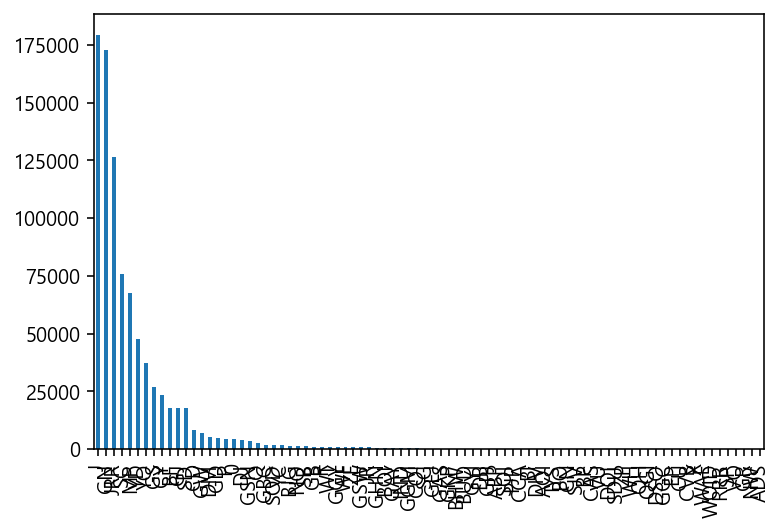

In [25]:
#AD1 컬럼 분포 확인
df_atype_count=df['AD1'].value_counts()
print(df_atype_count)
print(df_atype_count.plot.bar())

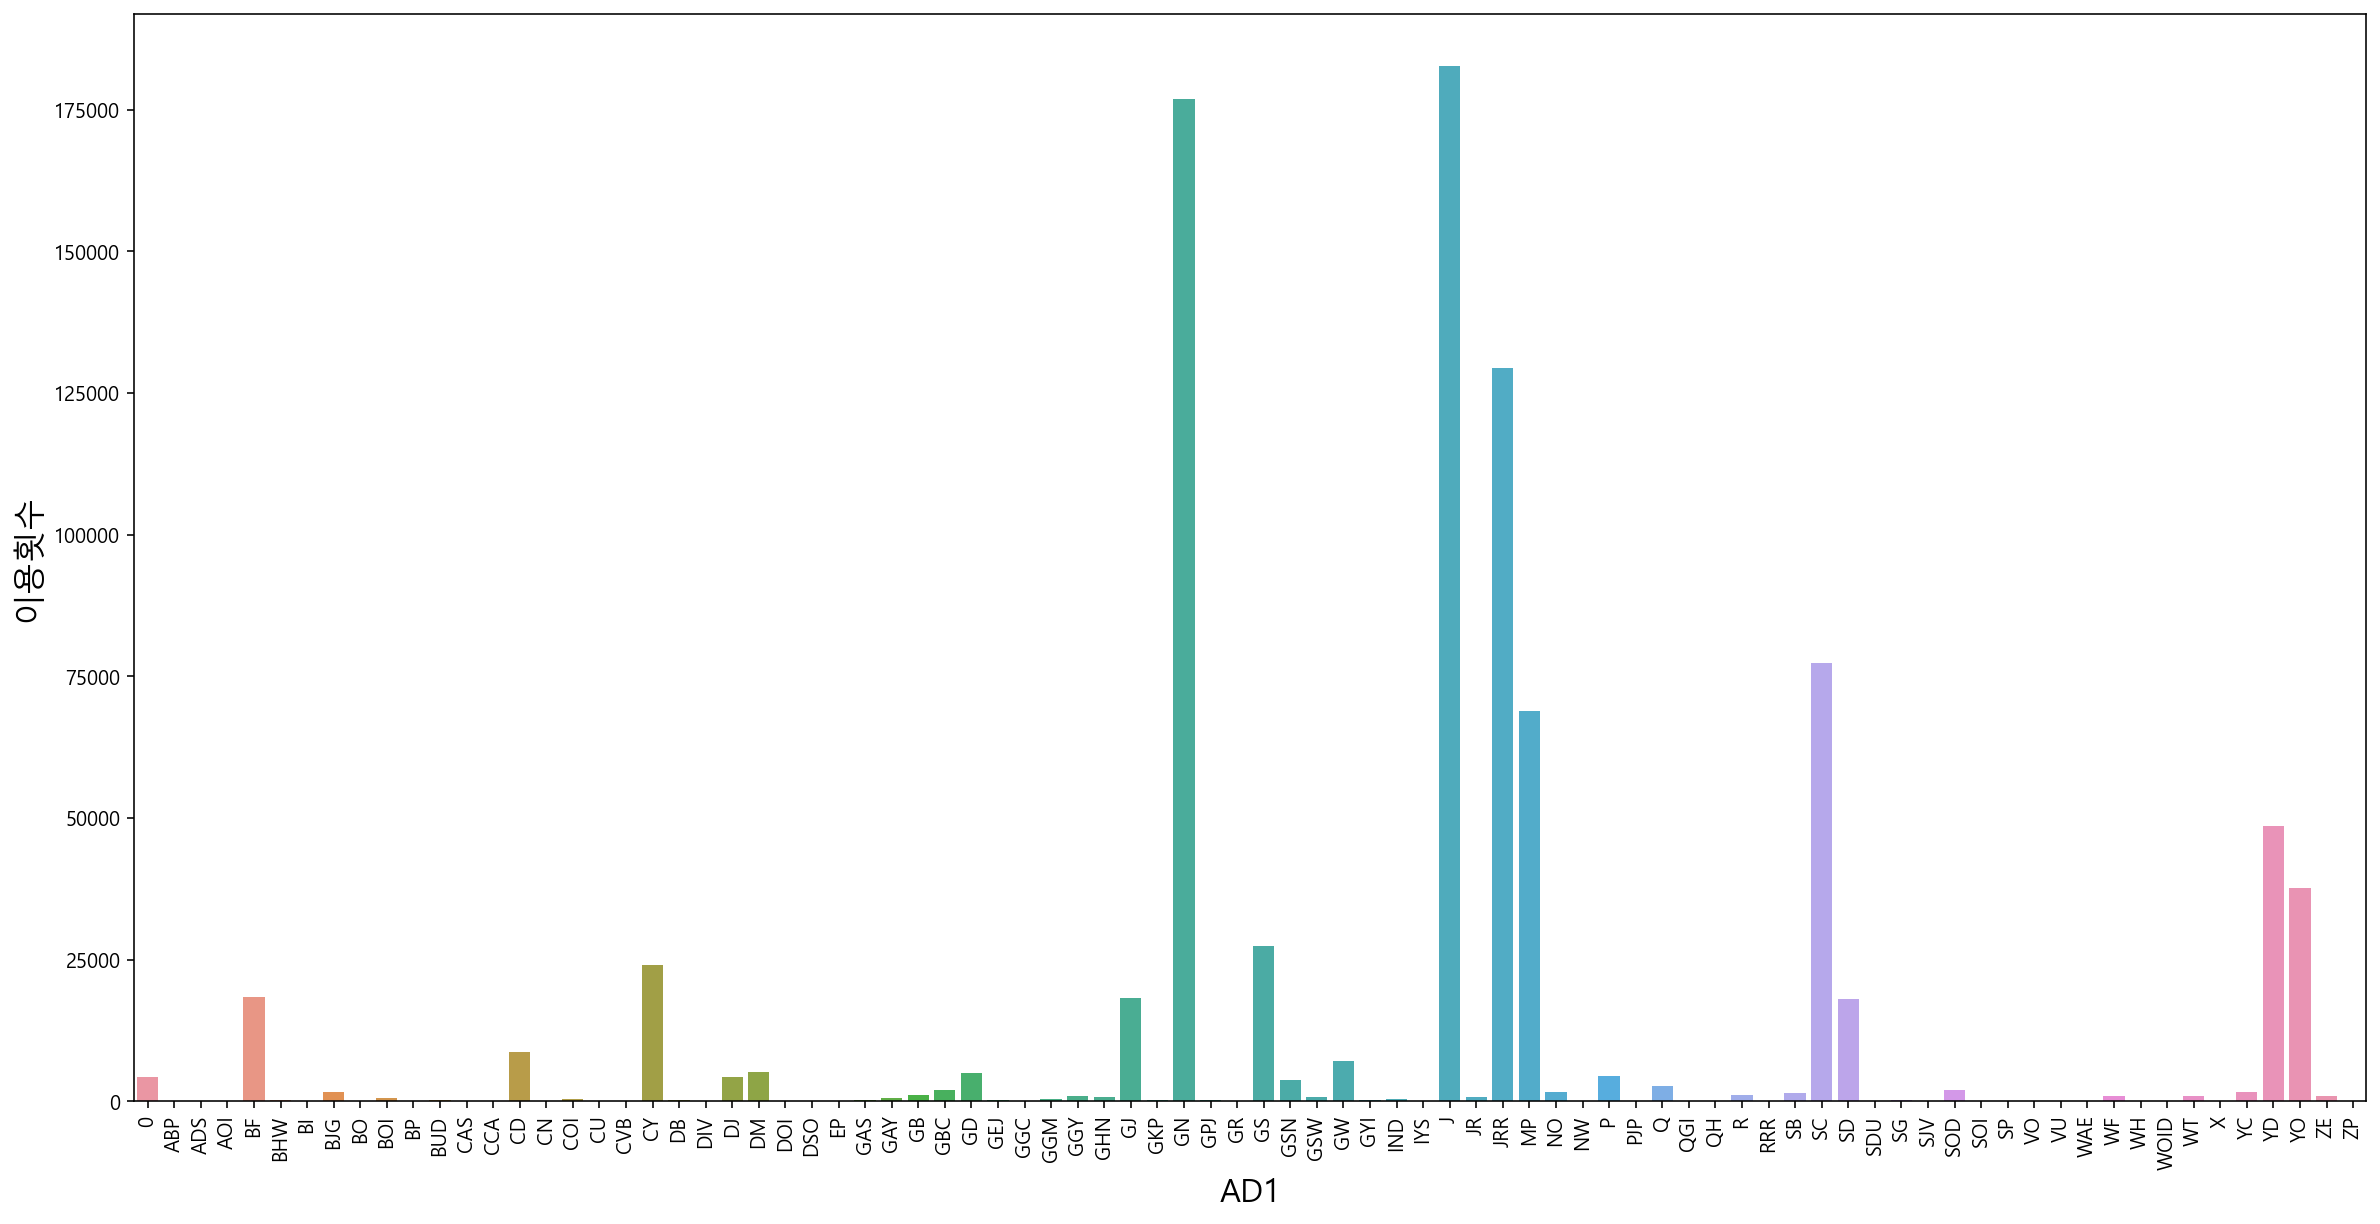

In [26]:
# AD1별 이용횟수별 시각화
plt.figure(figsize=(20,10))
sns.barplot(x=df.groupby("AD1")["COUNT"].sum().keys(),y=df.groupby("AD1")["COUNT"].sum())
plt.ylabel('이용횟수', fontsize=16)
plt.xlabel('AD1', fontsize=16)
plt.xticks(rotation='vertical')
plt.show()

> **AD1은 J,GN, JRR의 사용이 다른 변수들보다 비교적 많음**

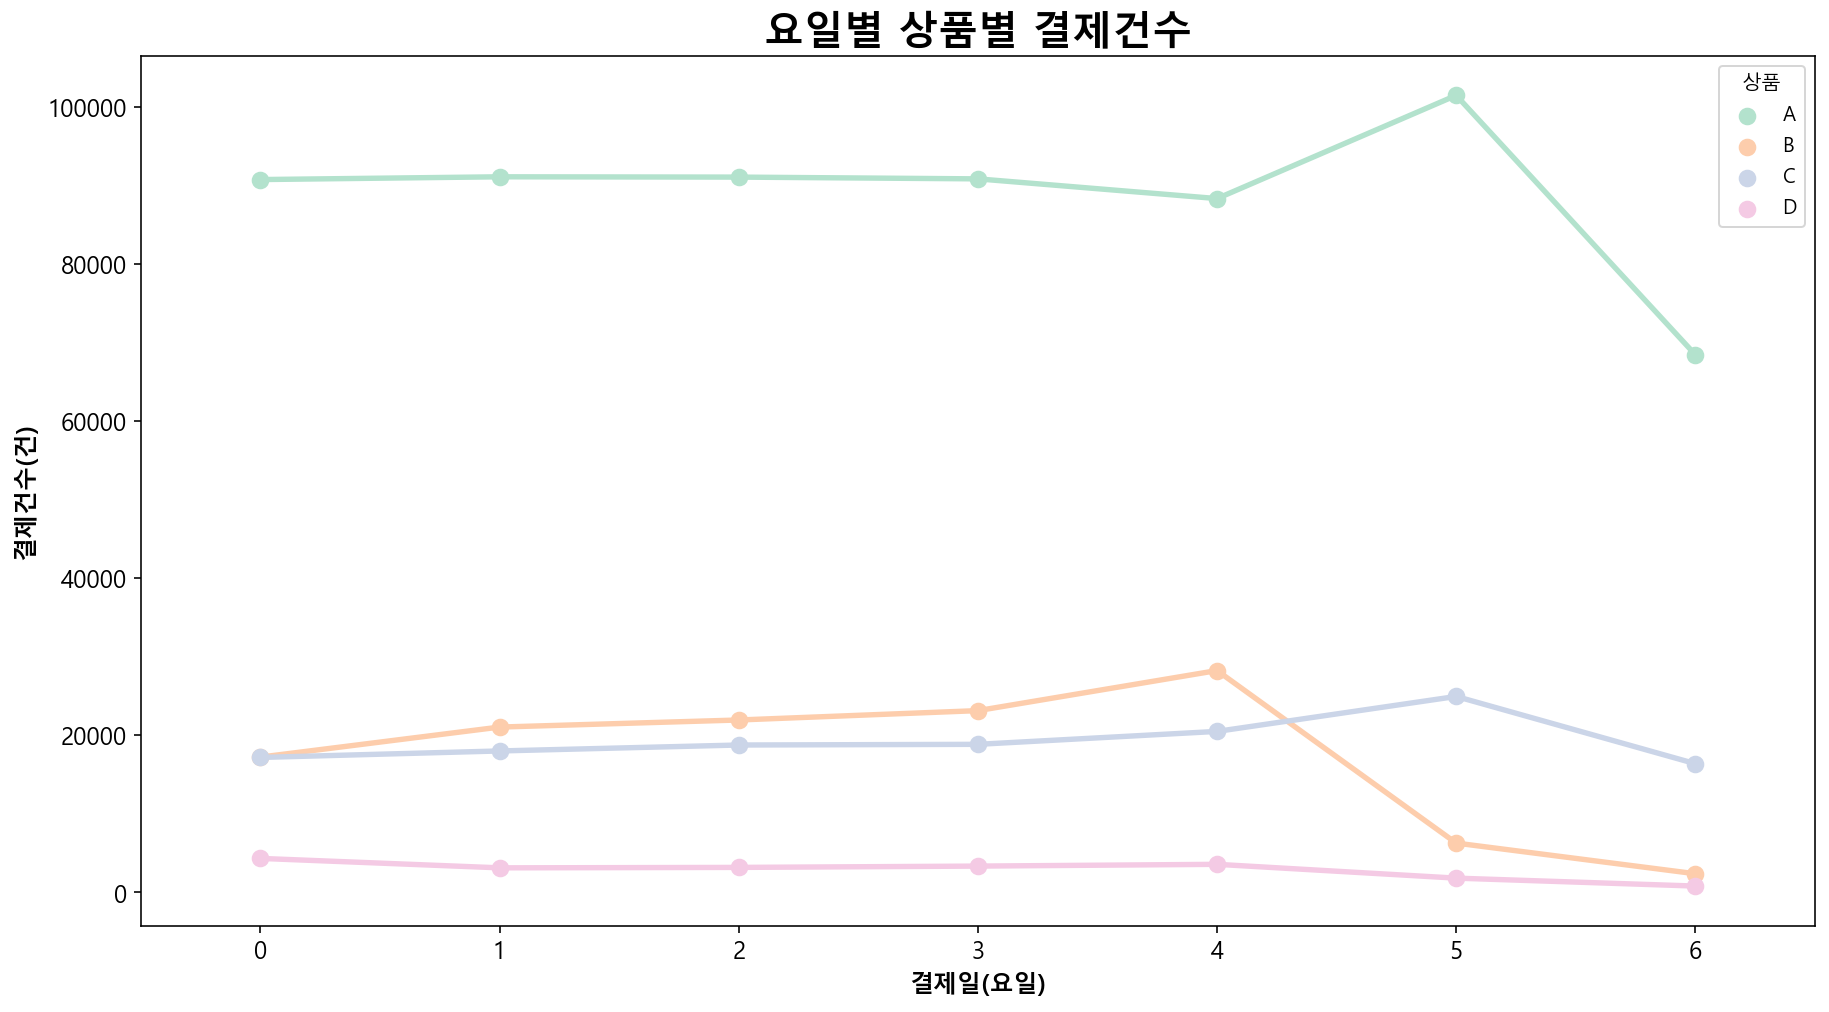

In [27]:
#요일별 상품별 결제건수
dfj=df.copy()
dfj['DAY'] = dfj['DATE'].dt.weekday

jison_df = dfj.groupby(['DAY','GOODS_TYPE'])['COUNT'].sum().reset_index()
jison_df = jison_df[['DAY','GOODS_TYPE','COUNT']]
jison_df.columns = ['결제일(요일)','상품','결제건수']

color = sns.set_palette("Pastel2")
fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.pointplot(x = '결제일(요일)', y = '결제건수', hue = '상품', data = jison_df, palette = color)
plt.title('요일별 상품별 결제건수', fontsize = 20, fontweight = 'bold')
plt.xlabel('결제일(요일)', fontsize = 12, fontweight = 'bold')
plt.ylabel('결제건수(건)', fontsize = 12, fontweight = 'bold')
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
plt.show()

### 3.2.2 목표변수와의 상관관계 확인

#### (1). USER_ID과 목표변수(COUNT)의 관계

In [28]:
#USER_ID별 COUNT의 MAX값
df_uc=df[['USER_ID','COUNT']]
df_ucmax=df_uc.groupby('USER_ID').max().reset_index()
df_ucmax

,USER_ID,COUNT
0,224,1
1,232,2
2,342,1
3,565,1
4,729,1
...,...,...
165419,1830551,1
165420,1830570,1
165421,1830580,1
165422,1830589,1


In [29]:
#USER_ID별 COUNT의 MEAN값
df_uc=df[['USER_ID','COUNT']]
df_ucmean=df_uc.groupby('USER_ID').mean().reset_index()
df_ucmean.sort_values(by='COUNT',ascending=False)

,USER_ID,COUNT
130780,1635143,23.00
108481,1544719,19.00
157735,1775410,17.00
121597,1599008,15.00
8713,430741,11.00
...,...,...
56886,1160108,1.00
56887,1160109,1.00
56888,1160114,1.00
56889,1160128,1.00


> **USER_ID 별로 COUNT 값의 크기가 다른 경향을 가지고 있음<br>
상관관계를 가지고 있다고 할 수 있음**

#### (2). JOIN_DATE와 목표변수(COUNT)의 관계

<AxesSubplot:xlabel='JOIN_DATE'>

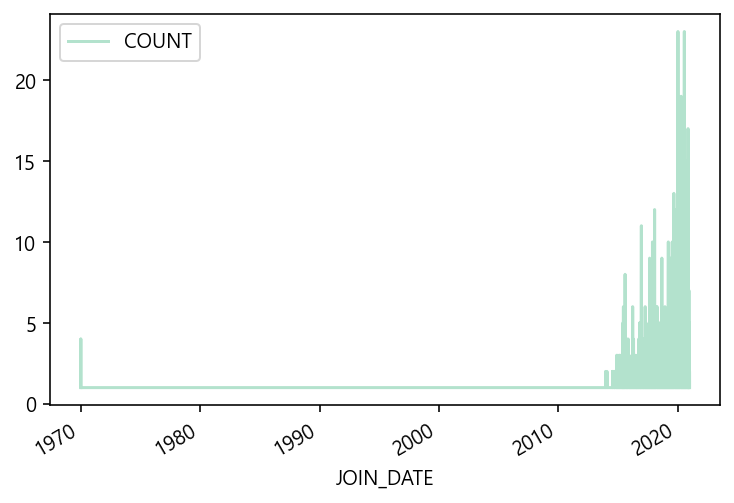

In [30]:
df.plot(x='JOIN_DATE', y='COUNT')

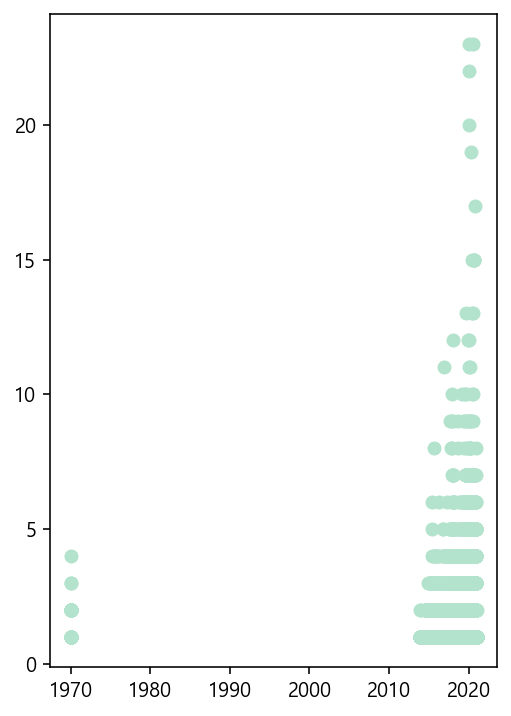

In [31]:
jx=df['JOIN_DATE']
jy=df['COUNT']
plt.figure(figsize=(4,6))
plt.scatter(jx,jy)
plt.show()

>**COUNT가 20 중반이상인 데이터는 특정날짜에 가입한 데이터들로 확인됨<br>
즉 이날 D_TYPE을 CC로하는 대규모계약이 이루어졌을것으로 추정됨**

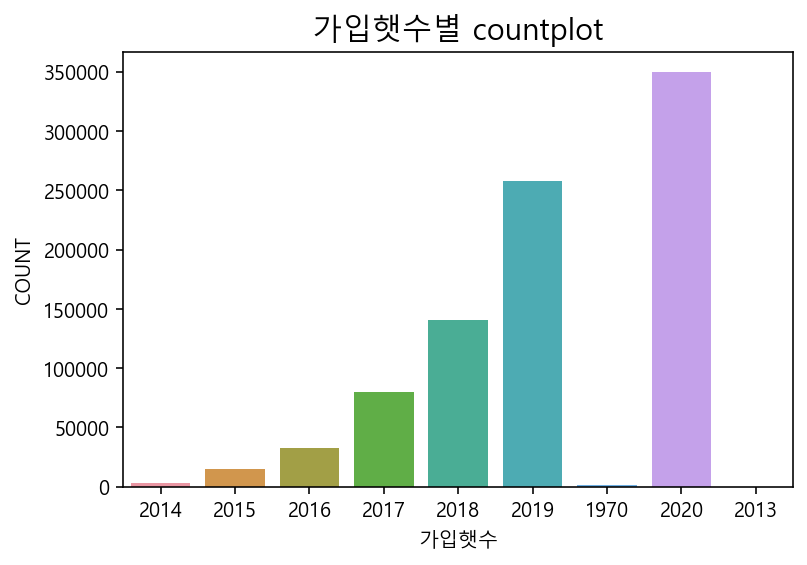

In [32]:
## 신규가입자와 이전 가입자 구분 COUNT 시각화
# 신규 가입자 (0년~3년)만 따로 df_yearc 생성해서 확인
sns.countplot(x='JOIN_DATE',data=df_yearc)
plt.xlabel('가입햇수')
plt.ylabel('COUNT')
plt.title('가입햇수별 countplot', fontsize=15)
plt.show()
df_yearc['DATE_YEAR'] = df_yearc['DATE'].dt.to_period(freq="A")
df_yearc['DATE_YEAR'] = df_yearc['DATE_YEAR'].astype(str)
df_yearc['DATE_YEAR'] = df_yearc['DATE_YEAR'].astype(int)
df_yearc['JOIN_DATE'] = df_yearc['JOIN_DATE'].astype(int)
years = []

In [33]:
# JOIN_DATE별 COUNT값
#시각화용 데이터 프레임 생성
df_g=df.copy()
df_g.JOIN_DATE = pd.to_datetime(df.JOIN_DATE) 
df_g.DATE = pd.to_datetime(df.DATE)
df_g.JOIN_DATE = df_g.JOIN_DATE.dt.to_period(freq="A") # 나중에 원핫인코딩으로 바꾸자.
df_g.JOIN_DATE = df_g.JOIN_DATE.astype(str)
df_g["MONTH"] = df_g.DATE.dt.strftime('%m')

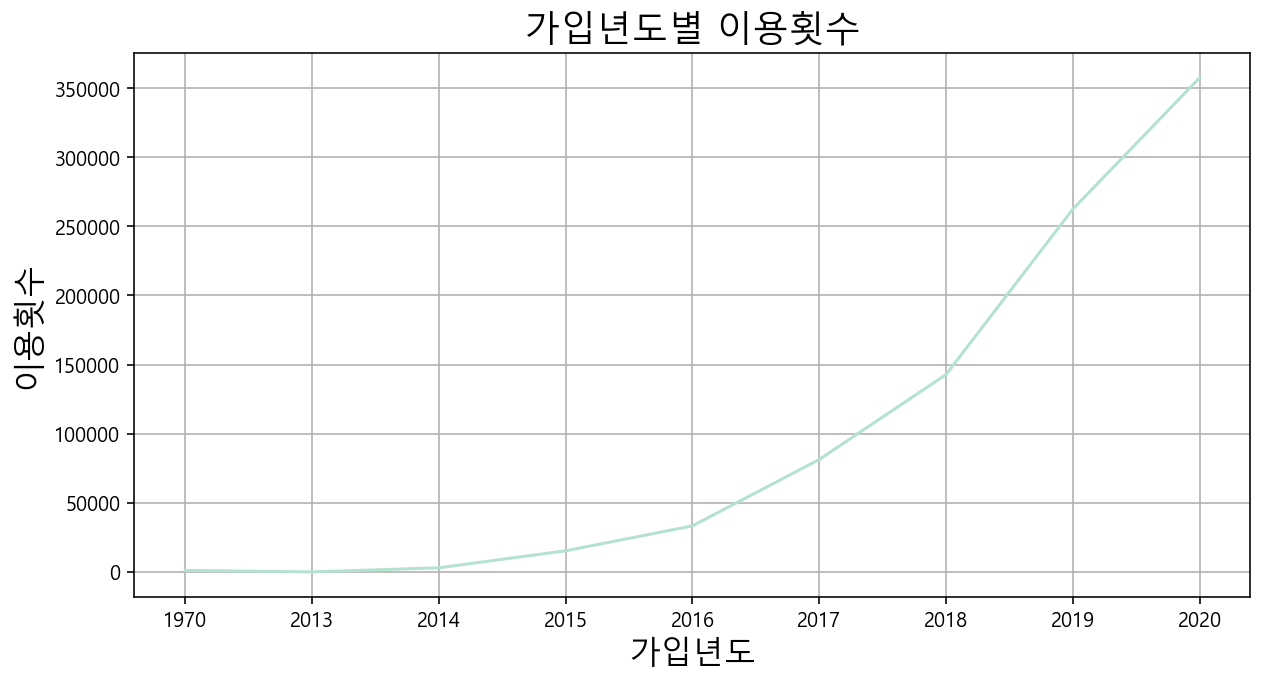

In [34]:
# JOIN_DATE별 COUNT값
plt.figure(figsize=(10,5))
sns.lineplot(df_g.groupby("JOIN_DATE")["COUNT"].sum().keys(),df_g.groupby("JOIN_DATE")["COUNT"].sum())
plt.grid()
plt.title('가입년도별 이용횟수', fontsize=18)
plt.ylabel('이용횟수', fontsize=16)
plt.xlabel('가입년도', fontsize=16)
plt.show()

>**가입년도 최근일 수록 월이용횟수가 증가하는 경향이 있음**

#### (3). D_TYPE과 목표변수(COUNT)의 관계

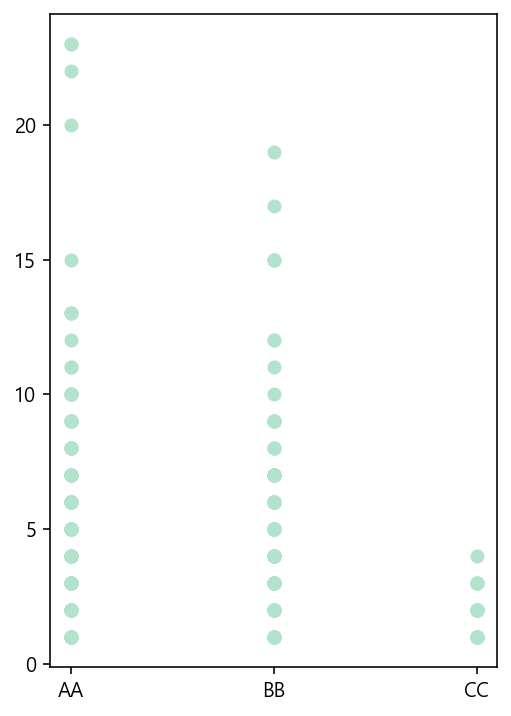

In [35]:
#D_TYPE과 목표변수와의 상관관계
dx=df['D_TYPE']
dy=df['COUNT']
plt.figure(figsize=(4,6))
plt.scatter(dx,dy)
plt.show()

>**COUNT가 25이상의 데이터는 전부 D_TYPE이 CC인 것을 확인할 수 있음<br>
그러나 다른 컬럼의 영향이 있을 수 있어 다른방식의 접근 필요**

In [36]:
#D_TYPE별 COUNT의 COUNT값
df_dc=df[['D_TYPE','COUNT']]
df_dcc=df_dc.groupby('D_TYPE').count().reset_index()
df_dcc.rename(columns={'COUNT':'COUNTS'},inplace=True)
df_dcc

,D_TYPE,COUNTS
0,AA,493166
1,BB,384541
2,CC,1198


In [37]:
#D_TYPE별 COUNT의 MAX값
df_dc=df[['D_TYPE','COUNT']]
df_dcmax=df_dc.groupby('D_TYPE').max().reset_index()
df_dcmax.rename(columns={'COUNT':'MAX_COUNT'},inplace=True)
df_dcmax

,D_TYPE,MAX_COUNT
0,AA,23
1,BB,19
2,CC,4


In [38]:
#D_TYPE별 COUNT의 MEAN값
df_dc=df[['D_TYPE','COUNT']]
df_dcmean=df_dc.groupby('D_TYPE').mean().reset_index()
df_dcmean.rename(columns={'COUNT':'MEAN_COUNT'},inplace=True)
df_dcmean

,D_TYPE,MEAN_COUNT
0,AA,1.02
1,BB,1.02
2,CC,1.04


In [39]:
#D_TYPE별 COUNT의 MEAN값
df1=df[df['USER_ID']!=999665]
df1_dc=df1[['D_TYPE','COUNT']]
df1_dcmean=df1_dc.groupby('D_TYPE').mean().reset_index()
df1_dcmean.rename(columns={'COUNT':'MEAN_COUNT'},inplace=True)
df1_dcmean

,D_TYPE,MEAN_COUNT
0,AA,1.02
1,BB,1.02
2,CC,1.04


>**실제 D_TYPE별 이용횟수의 평균을 구하자 비슷하게 나옴
다만 타입별 분포의 특이성을 고려해 컬럼으로 투입**

#### (4). STORE_ID과 목표변수(COUNT)의 관계

In [40]:
#STORE_ID와 AD1과의 상관관계
ad1_list = df['AD1'].unique()
for k in ad1_list :
    new_df = df[df['AD1']==k]
    print(k,"의 STORE_ID 리스트 : ", new_df['STORE_ID'].unique())

GN 의 STORE_ID 리스트 :  [  1892   1900 220690  90542   2457 109839 204481 106329 104988  82407
   2058 220660 104916  90444  96266 220685 204526 190054  90500    472
 207620  90445  90545 131080 219913 109905  82430 207623 220071 220692
 190483 220284 204444  90447 173872  90461 220582 220578 220700 220667
 109832 173176  96257 220735 220607 104905 220612 109805 105345  82429
 220087 109796 105426 106112 219977 220689 219886 204535 109768 220773
  90433 220680 220635 106347 104985   1053 137450  90473 109526 220394
  90448 203642 204443 204500 181817    607 109745 108963 220763 109801
 109780 105424 220848 220850 108914 106355 220259 220377 220312 207629
    453 220882 220971  83199 109877 220933 220906 190482 204458 220854
 220962 221022 173848 221013  97305  97308 220628  90516 221045 222219
    774 222210 219888 222301 222313 222317   1070 222381 222331 222819
 223025 223012   1058 223141 223135 223650 223653 109819    456 228926
 228941 228946 229411 228962 230736 230732 230836 230866

ZP 의 STORE_ID 리스트 :  [220973 221040]
EP 의 STORE_ID 리스트 :  [220974]
Q 의 STORE_ID 리스트 :  [221023 222283 223088 223084 157735 230911]
BO 의 STORE_ID 리스트 :  [220919 223066 225646]
ZE 의 STORE_ID 리스트 :  [220982 221894 219891 222352 222385 222384 223124 110138]
RRR 의 STORE_ID 리스트 :  [108837]
QGI 의 STORE_ID 리스트 :  [220383]
DSO 의 STORE_ID 리스트 :  [220307 106256 225680  68628 225668 225639 230963]
SOD 의 STORE_ID 리스트 :  [222333 223164 223654 223625 230937]
BOI 의 STORE_ID 리스트 :  [222360 190210 223036]
WT 의 STORE_ID 리스트 :  [223053 222423 230192 230942 230926 230932 230933 231403]
BP 의 STORE_ID 리스트 :  [223073 222428]
SP 의 STORE_ID 리스트 :  [181991 220705]
CN 의 STORE_ID 리스트 :  [223166 222397 227435 227439]
SJV 의 STORE_ID 리스트 :  [223666 225636 228960]
SDU 의 STORE_ID 리스트 :  [225671 225674 225655 225656 225672 225670 231090 231091 225676]
QH 의 STORE_ID 리스트 :  [223616 230935 231140 230996]
BUD 의 STORE_ID 리스트 :  [223617]
CU 의 STORE_ID 리스트 :  [230196 230902]
VU 의 STORE_ID 리스트 :  [220783 230989]
WAE 의 STORE_ID 

> **STORE_ID는 AD1을 구성하는 데이터<br>
따라서 AD1이 STORE_ID의 의미를 담고있음**

#### (5). GOODS_TYPE과 목표변수(COUNT)의 관계

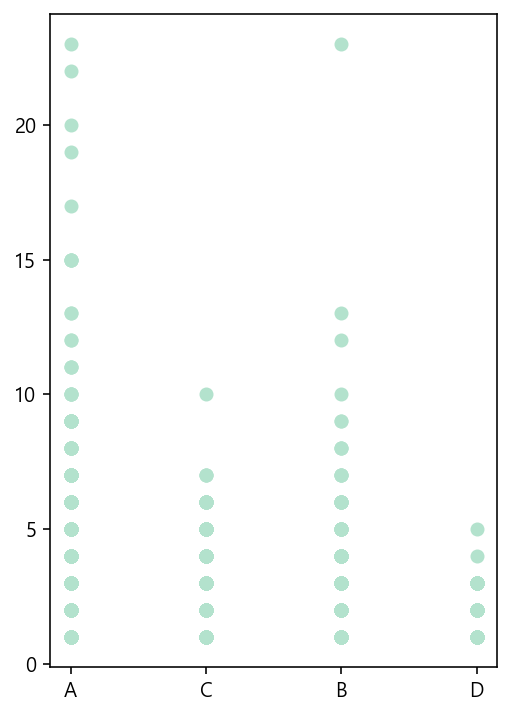

In [41]:
#GOODS_TYPE과 목표변수와의 상관관계
gx=df['GOODS_TYPE']
gy=df['COUNT']
plt.figure(figsize=(4,6))
plt.scatter(gx,gy)
plt.show()

> **GOODS_TYPE B는 낮은 COUNT를 기록하는 경향이 있음<br>
40이상의 COUNT를 기록한 데이터는 GOODS_TYPE이 대부분 A값을 가짐<br>
50이상의 COUNT를 기록한 데이터는 GOODS_TYPE이 모두 A값을 가짐<br>
다른 변수에 의해 기록된 그래프일 확률이 있어 다른 방식의 접근 필요**

In [42]:
#GOODS_TYPE별 COUNT의 COUNT값
df_gc=df[['GOODS_TYPE','COUNT']]
df_gcc=df_gc.groupby('GOODS_TYPE').count().reset_index()
df_gcc.rename(columns={'COUNT':'COUNTS'},inplace=True)
df_gcc

,GOODS_TYPE,COUNTS
0,A,609494
1,B,118541
2,C,131108
3,D,19762


In [43]:
#GOODS_TYPE별 COUNT의 MAX값
df_gc=df[['GOODS_TYPE','COUNT']]
df_gcmax=df_gc.groupby('GOODS_TYPE').max().reset_index()
df_gcmax.rename(columns={'COUNT':'MAX_COUNT'},inplace=True)
df_gcmax

,GOODS_TYPE,MAX_COUNT
0,A,23
1,B,23
2,C,10
3,D,5


In [44]:
#GOODS_TYPE별 COUNT의 MEAN값
df_gc=df[['GOODS_TYPE','COUNT']]
df_gcmean=df_gc.groupby('GOODS_TYPE').mean().reset_index()
df_gcmean.rename(columns={'COUNT':'MEAN_COUNT'},inplace=True)
df_gcmean

,GOODS_TYPE,MEAN_COUNT
0,A,1.02
1,B,1.01
2,C,1.03
3,D,1.02


>**실제 GOODS_TYPE별 이용횟수의 평균을 구하자 비슷하게 나옴<br>
다만 타입별 분포의 특이성을 고려해 컬럼으로 투입**

#### (6). DATE와 목표변수(COUNT)의 관계

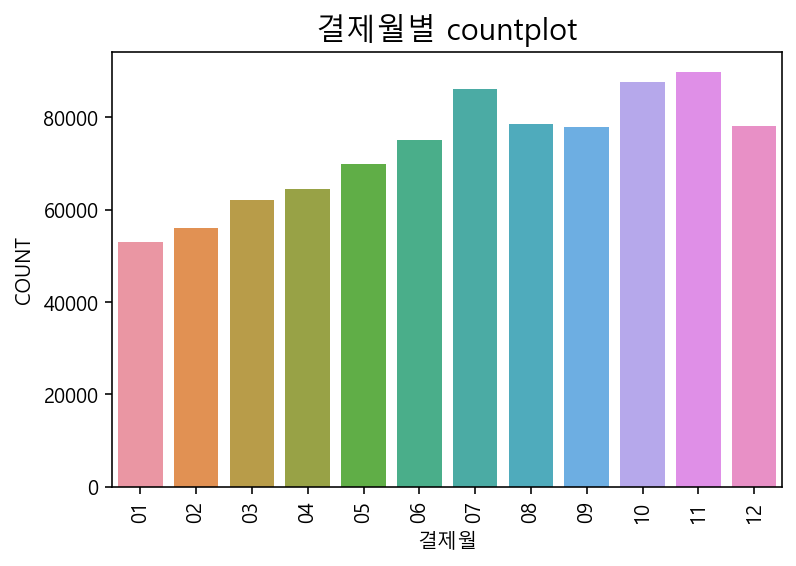

In [45]:
## 이윤지님 코드
sns.countplot(x=df_yearc['MONTH'],data=df_yearc)
plt.xticks(rotation=90)
plt.xlabel('결제월')
plt.ylabel('COUNT')
plt.title('결제월별 countplot', fontsize=15)
plt.show()

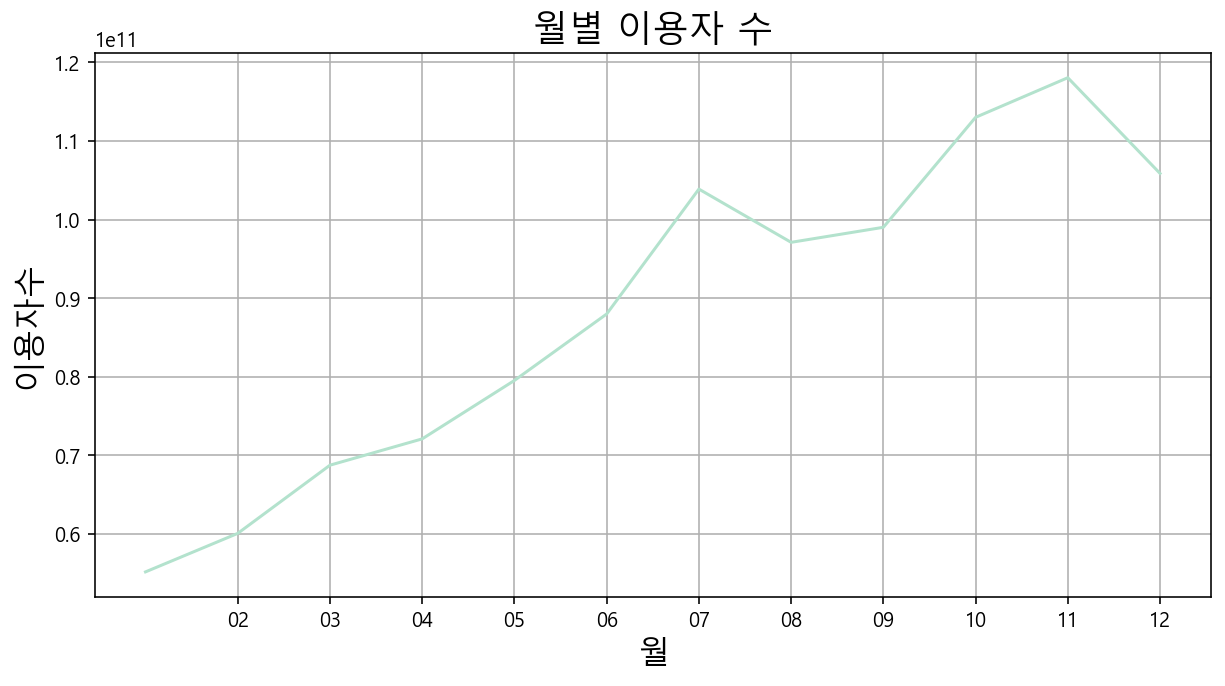

In [46]:
# 월별로 이용횟수 수 파악
plt.figure(figsize=(10,5))
sns.lineplot(df_g['MONTH'].unique(),df_g.groupby("MONTH")["USER_ID"].sum()) # 2010년   
plt.grid()
plt.xticks(np.arange(1, 12, step=1)) # 월이면 1~12 / 주간이면 1~53 / ~~
plt.title('월별 이용자 수', fontsize=18)
plt.ylabel('이용자수', fontsize=16)
plt.xlabel('월', fontsize=16)
plt.show()

>**서비스 이용날짜가 최근에 가까워짐에 따라 COUNT의 수가 커지는 경향을 보임<br>**
>**시계열 순으로 train과 test를 분리했고 기간내 계절과 연의 순환이 없음<br>
주중과 주말 및 공휴일에 차이가 있지않을까?**

In [47]:
df_day=pd.read_csv('./data/실전db.csv', encoding='cp949')
# 이상치(일반적인 이용자라고 추정할 수 없는 USER_ID) 제거
df_day=df_day[df_day["USER_ID"] != 999665]
df_day=df_day.reset_index()
df_day.drop(['index'], axis=1, inplace=True)

In [48]:
df_day.JOIN_DATE = pd.to_datetime(df_day.JOIN_DATE) 
df_day.DATE = pd.to_datetime(df_day.DATE)
holiday_list = ['2020-01-01','2020-01-24','2020-01-25','2020-01-26','2020-01-27','2020-03-01',
                '2020-05-05','2020-04-15','2020-04-30','2020-06-06','2020-08-15','2020-09-30','2020-10-01',
                '2020-10-02','2020-10-03','2020-10-09','2020-12-25']

In [49]:
# 공휴일 컬럼 만들기
# 2020년 휴일 리스트
holiday_list = ['2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-03-01', '2020-05-05', '2020-04-15', '2020-04-30', '2020-06-06', '2020-08-15', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25']
day_type_list = []
for z in range(len(df_day)) :
    if df_day['DATE'].loc[z].strftime('%Y-%m-%d') in holiday_list :
        day_type_list.append("공휴일")         
    elif df_day['DATE'].loc[z].weekday() > 4 :
        day_type_list.append("주말")        
    else :
        day_type_list.append("주중")          
df_day["DAY_TYPE"] = day_type_list 

In [50]:
# DAY TYPE별 분류
df_day_0= df_day[df_day['DAY_TYPE']=='주말']
df_day_1= df_day[df_day['DAY_TYPE']=='공휴일']
df_day_2= df_day[df_day['DAY_TYPE']=='주중']

In [51]:
# COUNT와 요일별 연관성 파악
def day_count(df) :
    print(df["DAY_TYPE"].iloc[0],"데이터입니다.\n")
    new_df_4 = df[df["COUNT"] > 4]
    print("데이터 중 4보다 큰 COUNT 항의 개수 :",len(new_df_4))
    new_df_1 = df[df["COUNT"] > 1]
    print("데이터 중 1보다 큰 COUNT 항의 개수 :",len(new_df_1),"\n")
    print("전체 주말데이터의 개수 :", len(df))
    print('데이터 중 5회 이상 사용한 사람의 비율 :',(len(new_df_4)/len(df))*100)
    print('데이터 중 2회 이상 사용한 사람의 비율 :',(len(new_df_1)/len(df))*100)

    print()
    print()

In [52]:
#주말과 COUNT의 관계
day_count(df_day_0)

주말 데이터입니다.

데이터 중 4보다 큰 COUNT 항의 개수 : 106
데이터 중 1보다 큰 COUNT 항의 개수 : 3721 

전체 주말데이터의 개수 : 208282
데이터 중 5회 이상 사용한 사람의 비율 : 0.05089253992183674
데이터 중 2회 이상 사용한 사람의 비율 : 1.7865201985769292




In [53]:
#공휴일과 COUNT의 관계
day_count(df_day_1)

공휴일 데이터입니다.

데이터 중 4보다 큰 COUNT 항의 개수 : 7
데이터 중 1보다 큰 COUNT 항의 개수 : 472 

전체 주말데이터의 개수 : 25218
데이터 중 5회 이상 사용한 사람의 비율 : 0.02775795067015624
데이터 중 2회 이상 사용한 사람의 비율 : 1.871678959473392




In [54]:
#주중과 COUNT의 관계
day_count(df_day_2)

주중 데이터입니다.

데이터 중 4보다 큰 COUNT 항의 개수 : 167
데이터 중 1보다 큰 COUNT 항의 개수 : 10937 

전체 주말데이터의 개수 : 645405
데이터 중 5회 이상 사용한 사람의 비율 : 0.025875225633516942
데이터 중 2회 이상 사용한 사람의 비율 : 1.6945948667890702




>**주중, 주말, 공휴일간 COUNT의 수가 차이 있음<br>
DAY_TYPE에 따른 상관관계 존재**

#### (7). AD1과 목표변수(COUNT)의 관계

In [55]:
#AD1별 COUNT의 MAX값
df_ac=df[['AD1','COUNT']]
df_acmax=df_ac.groupby('AD1').max().reset_index()
df_acmax

,AD1,COUNT
0,0,3
1,ABP,2
2,ADS,1
3,AOI,1
4,BF,7
...,...,...
79,YC,3
80,YD,9
81,YO,8
82,ZE,4


In [56]:
#AD1별 COUNT의 MEAN값
df_ac=df[['AD1','COUNT']]
df_acmean=df_ac.groupby('AD1').mean().reset_index()
df_acmean

,AD1,COUNT
0,0,1.01
1,ABP,1.01
2,ADS,1.00
3,AOI,1.00
4,BF,1.02
...,...,...
79,YC,1.01
80,YD,1.02
81,YO,1.02
82,ZE,1.04


>**AD1의 이니셜은 지역이니셜이 아닐까?<br>
서울지역은 비서울지역보다 평균적으로 COUNT가 높은 경향을 가지지 않을까?**

In [57]:
seoul=['JR', 'J', 'YO', 'SOD', 'GJ', 'DM', 'JRR', 'SB', 'GB', 'DB', 'NW', 'EP', 'SD', 'MP', 'YC', 'GS', 'GR', 'GHN', 'YD', 'DJ', 'GW', 'SC', 'GN', 'SP', 'GD']
in_seoul = []
out_of_seoul = []
for x in df['AD1'].unique() :
    new_df = df[df['AD1']==x]
    if x in seoul :
        in_seoul.append(new_df['STORE_ID'].nunique())
    else :
        out_of_seoul.append(new_df['STORE_ID'].nunique())

print("서울 AD1 STORE_ID 평균 개수 :",sum(in_seoul)/25)
print("서울 외 AD1 STORE_ID 평균 개수 :",sum(out_of_seoul)/60)

서울 AD1 STORE_ID 평균 개수 : 28.64
서울 외 AD1 STORE_ID 평균 개수 : 5.733333333333333


>**AD1의 이니셜은 서울인것으로 추정됨**

In [58]:
sc=0
ns=0
nsc=0
nns=0
ms=0
mns=0
for i in df.index:
        val = df.loc[i, 'AD1']
        if val in seoul :
            sc=sc+df.loc[i,'COUNT']
            if df.loc[i,'COUNT']>ms :
                ms=df.loc[i,'COUNT']
            ns=ns+1
        else :
            nsc=nsc+df.loc[i,'COUNT']
            if df.loc[i,'COUNT']>mns :
                mns=df.loc[i,'COUNT']
            nns=nns+1

print("서울 AD1 COUNT 평균 개수 :",sc/ns,"서울 AD1 COUNT MAX값 :",ms)
print("서울 외 AD1 COUNT 평균 개수 :",nsc/nns,"서울 AD1 COUNT MAX값 :",mns)

서울 AD1 COUNT 평균 개수 : 1.0203977600789558 서울 AD1 COUNT MAX값 : 23
서울 외 AD1 COUNT 평균 개수 : 1.0214825306893296 서울 AD1 COUNT MAX값 : 15


>**GOODS_TYPE, D_TYPE과 마찬가지로 타입별 분포의 특이성을 고려해 컬럼으로 투입**

#### (8). 날씨데이터와 목표변수(COUNT)의 관계

In [59]:
#기상데이터
df_w=pd.read_csv('./data/서울시_기상데이터.csv', encoding='cp949')
# 기상청 센서 기준 NaN 값은 0으로 판단
df_w=df_w.fillna(0)
# 일시 컬럼을 일자와 시간으로 분리 
df_w['일자']=0
for i in range(len(df_w)):
    df_w['일자'][i] = df_w['일시'].iloc[i][:10]
    df_w['시간'] = 0
for i in range(len(df_w)):
    df_w['시간'][i] = df_w['일시'].iloc[i][11:]
#컬럼정리 
df_w = df_w[['일시','일자','시간', '기온','강수량','적설량']]
# datetime 형식으로 자료형 바꿔주기
df_w['일자'] = pd.to_datetime(df_w['일자'])
# 요일 컬럼 넣어주기 (월요일:0 ~ 일요일:6)
# 주말(토,일)은 5,6
df_w['요일'] = df_w['일자'].dt.weekday
# 공휴일은 주말로 바꿔주기
holiday_list = ['2020-01-01','2020-01-24','2020-01-25','2020-01-26','2020-01-27', 
                '2020-03-01','2020-05-05','2020-04-15','2020-04-30','2020-06-06', 
                '2020-08-15','2020-09-30','2020-10-01','2020-10-02','2020-10-03', 
                '2020-10-09','2020-12-25']
for zz in range(len(df_w)) :
    if df_w['일자'].loc[zz].strftime('%Y-%m-%d') in holiday_list :
        df_w['요일'].loc[zz] = 6

# 평일
weekday = df_w[(df_w['요일'] != 5) & (df_w['요일'] != 6)]
# 주중에는 오전 7시로 선택 
weekday = weekday[(weekday['시간']=='7:00')]
# 강수여부 컬럼 생성
weekday['강수여부'] = 0
for i in range(len(weekday)):
    if weekday['강수량'].iloc[i] > 0.0:
        weekday['강수여부'].iloc[i] = 1
    if weekday['적설량'].iloc[i] > 0.0:
        weekday['강수여부'].iloc[i] = 1

# 주말
weekend = df_w[(df_w['요일'] == 5) | (df_w['요일'] == 6)]
# 주말에는 12시 기준으로 선택
weekend = weekend[(weekend['시간']=='12:00')]
# 강수여부 컬럼 생성
weekend['강수여부'] = 0
for i in range(len(weekend)):
    if weekend['강수량'].iloc[i] != 0.0:
        weekend['강수여부'].iloc[i] = 1
    if weekend['적설량'].iloc[i] != 0.0:
        weekend['강수여부'].iloc[i] = 1

# 주중 주말 합쳐서 하나의 데이터프레임 만들기
everyday = pd.concat([weekday, weekend], ignore_index=True )
everyday.sort_values(by=['일자'], axis=0, inplace=True, ignore_index=True)
raining_day = everyday[['일자', '강수여부']]

# 폭염과 한파 
temperatures = df_w[(df_w['기온'] > 33) | (df_w['기온'] < -12)]
day = list(temperatures['일자'].unique())
# 이상 기온 여부 구분
everyday['이상기온'] =0 
for i in range(len(everyday)):
    if everyday['일자'].iloc[i] in day:
        everyday['이상기온'].iloc[i] = 1   
# 최종 강수여부, 이상기온 여부 데이터프레임
weather_col=everyday[['일자', '강수여부','이상기온']]
# 마지막 누락된 데이터 추가
weather_col.loc[365] = ['2020-12-31 00:00:00', 0, 1]
weather_col['일자'] = pd.to_datetime(weather_col['일자'])

In [60]:
weather_col

,일자,강수여부,이상기온
0,2020-01-01,1,0
1,2020-01-02,0,0
2,2020-01-03,0,0
3,2020-01-04,0,0
4,2020-01-05,0,0
...,...,...,...
361,2020-12-27,0,0
362,2020-12-28,0,0
363,2020-12-29,0,0
364,2020-12-30,0,1


In [61]:
#날씨데이터프레임 생성
weather_col_eda=pd.merge(df,weather_col,how='outer',left_on='DATE',right_on='일자')
weather_col_eda["MONTH"] = weather_col_eda.DATE.dt.strftime('%m')

In [62]:
#강수여부와 목표변수와의 관계
df_rc=weather_col_eda[['강수여부','MONTH','COUNT']]
df_rcm=df_rc.groupby(['MONTH','강수여부']).mean().reset_index()
df_rc1=df_rc[df_rc['강수여부']==1]
df_rc0=df_rc[df_rc['강수여부']==0]
df_rcm

,MONTH,강수여부,COUNT
0,01,0,1.02
1,01,1,1.01
2,02,0,1.02
3,02,1,1.02
4,03,0,1.02
5,04,0,1.02
6,04,1,1.01
7,05,0,1.02
8,05,1,1.02
9,06,0,1.02


In [63]:
#강수여부와 목표변수와의 관계
df_rc0['COUNT'].value_counts()

1     778210
2      12284
3        973
4        237
5        113
6         58
7         30
9         12
8         11
10         6
15         4
11         3
12         3
13         3
23         2
22         1
17         1
19         1
20         1
Name: COUNT, dtype: int64

In [64]:
#강수여부와 목표변수와의 관계
df_rc1['COUNT'].value_counts()

1    85565
2     1235
3       87
4       34
5       20
7        6
6        5
Name: COUNT, dtype: int64

In [65]:
#이상기온와 목표변수와의 관계
df_stc=weather_col_eda[['이상기온','MONTH','COUNT']]
df_stcm=df_stc.groupby(['MONTH','이상기온']).mean().reset_index()
df_stc1=df_stc[df_stc['이상기온']==1]
df_stc0=df_stc[df_stc['이상기온']==0]
df_stcm

,MONTH,이상기온,COUNT
0,01,0,1.02
1,02,0,1.02
2,03,0,1.02
3,04,0,1.02
4,05,0,1.02
5,06,0,1.02
6,06,1,1.02
7,07,0,1.02
8,08,0,1.02
9,08,1,1.02


In [66]:
#강수여부와 목표변수와의 관계
df_stc0['COUNT'].value_counts()

1     847567
2      13251
3       1045
4        268
5        128
6         61
7         36
9         12
8         11
10         6
15         4
11         3
12         3
13         3
23         2
22         1
17         1
19         1
20         1
Name: COUNT, dtype: int64

In [67]:
#강수여부와 목표변수와의 관계
df_stc1['COUNT'].value_counts()

1    16208
2      268
3       15
5        5
4        3
6        2
Name: COUNT, dtype: int64

>**날씨데이터의 두 컬럼은(강수여부, 이상기온) 모두 월별 카운트 평균을 구하자 비슷하게 나옴<br>
다만 강수여부, 이상기온여부 별 분포의 특이성을 고려해 컬럼으로 투입**

#### (9). 교통량데이터와 목표변수(COUNT)의 관계
**교통량데이터는 서울유입과 비서울로 유출되는 교통량데이터로 나뉘는데 비서울로 유출되는 교통량데이터의 활용에 대한 근거를 확보하기 어려움**

## 3.3. EDA결론

### 3.3.1. EDA정리

**(1). 평균적을 높은 COUNT 횟수를 기록하는 USER_ID 그룹이 존재 <br>
(2). 대체적으로 최근에 가입할수록 높은 COUNT 횟수를 기록 <br>
(3). D_TYPE은 타입별 분포의 특이성을 가짐(상관관계가 있다고 생각됨) <br>
(4). STORE_ID는 AD1에 종속된 컬럼으로 AD1이 STORE_ID의 의미를 설명가능하다고 판단<br>
(5). GOODS_TYPE은 타입별 분포의 특이성을 가짐(상관관계가 있다고 생각됨) <br>
(6). DATE는 시계열 순으로 train과 test데이터를 나누었고 계절이나 연 순환 주기에 대한 판단이 어려움<br>
(7). DATE를 주중,주말,공휴일로 나누자 주중보다는 휴일에 COUNT가 높은 횟수를 기록하는 상관관계를 보임<br>
(8). AD1 지역이니셜로 추정, 지역을 서울과 비서울로 나누자 비서울그룹보다는 서울그룹에서 COUNT가 높은 횟수를 기록하는 상관관계를 보임 <br>
(9). 날씨데이터는 기상청의 정의에 따른 이상기후와 강수에 대해서만 일별로 유무를 체크해 컬럼으로 구성<br>
(10). 전체 데이터가 평균적으로 서울 데이터의 날씨와 비슷한 날씨를 보일 것이라는 가설을 수립(데이터가 수도권에 많을 것이라고 가정)<br>
(11). 날씨데이터는 타입별 분포의 특이성을 가짐(상관관계가 있다고 생각됨) <br>
(12). 교통량데이터는 서울유입과 비서울로유출되는 교통량데이터로 나뉘는데 비서울로 유출되는 교통량데이터를 이용하기 힘들다.<br>
(13). 일일단위 예측에서 분포의 특이성은 큰 영향이 없을 것으로 생각됨**

### 3.3.2. 가설 수립

**(1).USER_ID를 COUNT횟수 평균에 따라 3그룹으로 나눈 feature는 목표변수를 예측하는데 영향을 미칠 것이다.<br>
(2).JOIN_DATE를 연도별로 나눈 feature는 목표변수를 예측하는데 영향을 미칠것이다.<br>
(3). D_TYPE은 목표변수를 예측하는데 영향을 미칠것이다. <br>
(4). STORE_ID는 AD1과 다중공산성을 보일것이며 AD1이 STORE_ID의 설명력을 포함할 것이다.<br>
(5). GOODS_TYPE은 목표변수를 예측하는데 영향을 미칠것이다. <br>
(6). DATE을 주중,주말,공휴일로 나눈 feature는 목표변수를 예측하는데 영향을 미칠것이다.<br>
(7). AD1을 서울과 비서울 지역으로 나눈 feature는 목표변수를 예측하는데 영향을 미칠것이다.<br>
(8). 이상기후와 강수 여부를 기록한 feature들은 목표변수를 예측하는데 영향을 미칠것이다.**

# 4. 모델링 및 검증

In [68]:
#EDA관련 패키지 구성 및 디스플레이 설정
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from IPython.display import set_matplotlib_formats
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
set_matplotlib_formats('retina')
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', '{:.2f}'.format)

#R예측모델 관련 패키지 구성
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

## 4.1 이용자 일일(행별 카운트)단위 예측 모델링

In [69]:
# AD1 중 서울 내 지점 추정
seoul = """
1.종로구, JR

2. 중구, J

3.용산구, YO

4 성동구,SOD

 5광진구,GJ

 6동대문구, DM

7.중랑구, JRR

8.성북구, SB

9.강북구, GB

10.도봉구, DB

11. 노원구, NW

12.은평구, EP

13.서대문구, SD

14.마포구, MP

15.양천구, YC

16.강서구, GS

17.구로구, GR

18. 금천구, GHN

 19.영등포구,YD

 20.동작구, DJ

21. 관악구, GW

 22.서초구, SC

 23.강남구,GN

24. 송파구, SP

25.강동구 GD"""

# AD1 코드 추출
seoul = re.sub("[0-9.,가-힣 ]", "", seoul).split()

In [70]:
# 서울 내외 구분

# 컬럼 생성용 리스트 선언
ad1_type_list = []

# 빠른 계산을 위한 list
for k in range(len(df_day)) :
    # AD1_TYPE 파악
    if df_day["AD1"].loc[k] in seoul :
        ad1_type_list.append("SEOUL")
    else :
        ad1_type_list.append("NOT_SEOUL")
        
# 서울 구분 컬럼 생성
df_day['AD1_TYPE'] = ad1_type_list

In [71]:
# STORE_ID 제거하기
df_day = df_day.drop("STORE_ID", axis=1)

In [72]:
# JOIN_DATE와 DATE는 datetime 형태로 바꾼다
df_day.JOIN_DATE = pd.to_datetime(df_day.JOIN_DATE) 
df_day.DATE = pd.to_datetime(df_day.DATE)
# JOIN_DATE는 년도로 바꾼다.
df_day.JOIN_DATE = df_day.JOIN_DATE.dt.to_period(freq="A") # 나중에 원핫인코딩으로 바꾸자.
df_day.JOIN_DATE = df_day.JOIN_DATE.astype(str)
# DATE는 월별로 묶어서 새로운 컬럼을 생성
df_day["MONTH"] = df_day.DATE.dt.strftime('%m')

In [73]:
# 카테고리값을 One_hot_encoding
df_day = pd.get_dummies(df_day, columns=["JOIN_DATE", "DAY_TYPE", "AD1_TYPE"])

In [74]:
# 필요없는 컬럼 drop
df_day = df_day.drop(["AD1","AD1_TYPE_NOT_SEOUL"], axis=1)

In [75]:
# 데이터 선언
weather_df1 = pd.read_csv('./data/서울시_기상데이터.csv', encoding='cp949')

# 기상청 센서 기준 NaN 값은 0으로 판단
weather_df1 = weather_df1.fillna(0)

# 일시 컬럼을 일자와 시간으로 분리 
weather_df1['일자'] = 0
for i in range(len(weather_df1)):
    weather_df1['일자'][i] = weather_df1['일시'].iloc[i][:10]
    
weather_df1['시간'] = 0
for i in range(len(weather_df1)):
    weather_df1['시간'][i] = weather_df1['일시'].iloc[i][11:]
    
# 필요한 컬럼만 남기고 정린
weather_df1 = weather_df1[['일시','일자','시간', '기온','강수량','적설량']]

# datetime 형식으로 자료형 바꿔주기
weather_df1['일자'] = pd.to_datetime(weather_df1['일자'])

# 요일 컬럼 넣어주기 (월요일:0 ~ 일요일:6)
# 주말(토,일)은 5,6
weather_df1['요일'] = weather_df1['일자'].dt.weekday
weather_df1

# 공휴일은 주말로 바꿔주기
holiday_list = ['2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-03-01', '2020-05-05', '2020-04-15', '2020-04-30', '2020-06-06', '2020-08-15', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25']

for zz in range(len(weather_df1)) :
    if weather_df1['일자'].loc[zz].strftime('%Y-%m-%d') in holiday_list :
        weather_df1['요일'].loc[zz] = 6

In [76]:
# 평일
weekday1 = weather_df1[(weather_df1['요일'] != 5) & (weather_df1['요일'] != 6)]

# 주중에는 오전 7시로 선택 
weekday1 = weekday1[(weekday1['시간']=='7:00')]

# 강수여부 컬럼 생성
weekday1['강수여부'] = 0

for i in range(len(weekday1)):
    if weekday1['강수량'].iloc[i] > 0.0:
        weekday1['강수여부'].iloc[i] = 1
    if weekday1['적설량'].iloc[i] > 0.0:
        weekday1['강수여부'].iloc[i] = 1

In [77]:
# 주말
weekend1 = weather_df1[(weather_df1['요일'] == 5) | (weather_df1['요일'] == 6)]

# 주말에는 12시 기준으로 선택
weekend1 = weekend1[(weekend1['시간']=='12:00')]

# 강수여부 컬럼 생성
weekend1['강수여부'] = 0

for i in range(len(weekend1)):
    if weekend1['강수량'].iloc[i] != 0.0:
        weekend1['강수여부'].iloc[i] = 1
    if weekend1['적설량'].iloc[i] != 0.0:
        weekend1['강수여부'].iloc[i] = 1

In [78]:
# 주중 주말 합쳐서 하나의 데이터프레임 만들기
everyday1 = pd.concat([weekday1, weekend1], ignore_index=True )
everyday1.sort_values(by=['일자'], axis=0, inplace=True, ignore_index=True)

raining_day1 = everyday1[['일자', '강수여부']]

In [79]:
# 폭염과 한파 
temperatures1 = weather_df1[(weather_df1['기온'] > 33) | (weather_df1['기온'] < -12)]
day1 = list(temperatures1['일자'].unique())

# 이상 기온 여부 구분
everyday1['이상기온'] =0 
for i in range(len(everyday1)):
    if everyday1['일자'].iloc[i] in day1:
        everyday1['이상기온'].iloc[i] = 1
        
# 최종 강수여부, 이상기온 여부 데이터프레임
weather_var1 = everyday1[['일자', '강수여부','이상기온']]

# 마지막 누락된 데이터 추가
weather_var1.loc[365] = ['2020-12-31 00:00:00', 0, 1]

weather_var1['일자'] = pd.to_datetime(weather_var1['일자'])

In [80]:
df_day1=pd.merge(df_day, weather_var1, how="outer", left_on="DATE", right_on="일자")

In [81]:
df_day1=df_day1.drop("일자", axis=1)

In [82]:
#USER_ID별 COUNT의 COUNT값
df_uc=df[['USER_ID','COUNT']]
df_ucc=df_uc.groupby('USER_ID').count().reset_index()
df_ucc.rename(columns={'COUNT':'COUNTS'},inplace=True)

#USER_ID별 COUNT의 MAX값
df_uc=df[['USER_ID','COUNT']]
df_ucmax=df_uc.groupby('USER_ID').max().reset_index()
df_ucmax.rename(columns={'COUNT':'MAX_COUNT'},inplace=True)

#USER_ID별 COUNT의 MEAN값
df_uc=df[['USER_ID','COUNT']]
df_ucmean=df_uc.groupby('USER_ID').mean().reset_index()
df_ucmean.rename(columns={'COUNT':'MEAN_COUNT'},inplace=True)

In [83]:
df_ucm=pd.merge(df_ucmean,df_ucmax)
df_ucm=pd.merge(df_ucm,df_ucc)
df_ucm_not1=df_ucm[df_ucm.MAX_COUNT!=1]
df_ucm_1=df_ucm[df_ucm.MAX_COUNT==1]

In [84]:
df_ucm_1=df_ucm[df_ucm['MEAN_COUNT']==1]
df_ucm_1['USER_ID_TYPE']='A'
df_ucm_1=df_ucm_1[['USER_ID','USER_ID_TYPE']]
df_ucm_2=df_ucm[(df_ucm['MEAN_COUNT']>=3) & (df_ucm['COUNTS']>=2)]
df_ucm_2['USER_ID_TYPE']='B'
df_ucm_2=df_ucm_2[['USER_ID','USER_ID_TYPE']]
df_ucm_3=df_ucm[df_ucm['MEAN_COUNT']!=1]
df_ucm_3=df_ucm_3[(df_ucm_3['MEAN_COUNT']<3) | (df_ucm_3['COUNTS']==1)]
df_ucm_3['USER_ID_TYPE']='C'
df_ucm_3=df_ucm_3[['USER_ID','USER_ID_TYPE']]
df_ucm_3
df_ut=pd.concat([df_ucm_1,df_ucm_2,df_ucm_3])

In [85]:
df_day1=pd.merge(df_day1,df_ut,on='USER_ID')
df_day1=pd.get_dummies(df_day1,columns={'USER_ID_TYPE'})
df_day1

,USER_ID,D_TYPE,GOODS_TYPE,DATE,COUNT,MONTH,JOIN_DATE_1970,JOIN_DATE_2013,JOIN_DATE_2014,JOIN_DATE_2015,JOIN_DATE_2016,JOIN_DATE_2017,JOIN_DATE_2018,JOIN_DATE_2019,JOIN_DATE_2020,DAY_TYPE_공휴일,DAY_TYPE_주말,DAY_TYPE_주중,AD1_TYPE_SEOUL,강수여부,이상기온,USER_ID_TYPE_A,USER_ID_TYPE_B,USER_ID_TYPE_C
0,2858,AA,A,2020-01-01,1,01,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
1,5647,BB,A,2020-01-01,1,01,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
2,5647,BB,B,2020-02-10,1,02,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
3,33314,BB,A,2020-01-01,1,01,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0
4,33314,BB,C,2020-05-01,1,05,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878900,1830551,BB,B,2020-12-31,1,12,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0
878901,1830570,BB,B,2020-12-31,1,12,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0
878902,1830580,AA,B,2020-12-31,1,12,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0
878903,1830589,BB,B,2020-12-31,1,12,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0


In [86]:
#min-max 정규화 함수
def mmnorm(s):
    return (s - s.min()) / ( s.max() - s.min())

In [87]:
df_day1['DAY_TYPE_공휴일']=mmnorm(df_day1[['DAY_TYPE_공휴일']])
df_day1['DAY_TYPE_주말']=mmnorm(df_day1[['DAY_TYPE_주말']])
df_day1['DAY_TYPE_주중']=mmnorm(df_day1[['DAY_TYPE_주중']])
df_day1['강수여부']=mmnorm(df_day1[['강수여부']])
df_day1['이상기온']=mmnorm(df_day1[['이상기온']])

In [88]:
df_day1

,USER_ID,D_TYPE,GOODS_TYPE,DATE,COUNT,MONTH,JOIN_DATE_1970,JOIN_DATE_2013,JOIN_DATE_2014,JOIN_DATE_2015,JOIN_DATE_2016,JOIN_DATE_2017,JOIN_DATE_2018,JOIN_DATE_2019,JOIN_DATE_2020,DAY_TYPE_공휴일,DAY_TYPE_주말,DAY_TYPE_주중,AD1_TYPE_SEOUL,강수여부,이상기온,USER_ID_TYPE_A,USER_ID_TYPE_B,USER_ID_TYPE_C
0,2858,AA,A,2020-01-01,1,01,0,0,1,0,0,0,0,0,0,1.00,0.00,0.00,1,1.00,0.00,1,0,0
1,5647,BB,A,2020-01-01,1,01,0,0,1,0,0,0,0,0,0,1.00,0.00,0.00,1,1.00,0.00,1,0,0
2,5647,BB,B,2020-02-10,1,02,0,0,1,0,0,0,0,0,0,0.00,0.00,1.00,1,0.00,0.00,1,0,0
3,33314,BB,A,2020-01-01,1,01,0,0,1,0,0,0,0,0,0,1.00,0.00,0.00,1,1.00,0.00,1,0,0
4,33314,BB,C,2020-05-01,1,05,0,0,1,0,0,0,0,0,0,0.00,0.00,1.00,1,0.00,0.00,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878900,1830551,BB,B,2020-12-31,1,12,0,0,0,0,0,0,0,0,1,0.00,0.00,1.00,1,0.00,1.00,1,0,0
878901,1830570,BB,B,2020-12-31,1,12,0,0,0,0,0,0,0,0,1,0.00,0.00,1.00,0,0.00,1.00,1,0,0
878902,1830580,AA,B,2020-12-31,1,12,0,0,0,0,0,0,0,0,1,0.00,0.00,1.00,1,0.00,1.00,1,0,0
878903,1830589,BB,B,2020-12-31,1,12,0,0,0,0,0,0,0,0,1,0.00,0.00,1.00,1,0.00,1.00,1,0,0


In [89]:
df_day1=df_day1[["DATE",'USER_ID','AD1_TYPE_SEOUL','DAY_TYPE_주중','DAY_TYPE_주말','DAY_TYPE_공휴일','강수여부','이상기온','USER_ID_TYPE_A','USER_ID_TYPE_B','USER_ID_TYPE_C','COUNT']]
df_day1

,DATE,USER_ID,AD1_TYPE_SEOUL,DAY_TYPE_주중,DAY_TYPE_주말,DAY_TYPE_공휴일,강수여부,이상기온,USER_ID_TYPE_A,USER_ID_TYPE_B,USER_ID_TYPE_C,COUNT
0,2020-01-01,2858,1,0.00,0.00,1.00,1.00,0.00,1,0,0,1
1,2020-01-01,5647,1,0.00,0.00,1.00,1.00,0.00,1,0,0,1
2,2020-02-10,5647,1,1.00,0.00,0.00,0.00,0.00,1,0,0,1
3,2020-01-01,33314,1,0.00,0.00,1.00,1.00,0.00,1,0,0,1
4,2020-05-01,33314,1,1.00,0.00,0.00,0.00,0.00,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
878900,2020-12-31,1830551,1,1.00,0.00,0.00,0.00,1.00,1,0,0,1
878901,2020-12-31,1830570,0,1.00,0.00,0.00,0.00,1.00,1,0,0,1
878902,2020-12-31,1830580,1,1.00,0.00,0.00,0.00,1.00,1,0,0,1
878903,2020-12-31,1830589,1,1.00,0.00,0.00,0.00,1.00,1,0,0,1


In [90]:
# 시간순서로 나열
df_day1= df_day1.sort_values(by="DATE")

In [91]:
# 데이터 나누기
X_train1 = df_day1[:623305]
X_test1 = df_day1[623305:]

In [92]:
# 필요없는 컬럼 제거
train_x1 = X_train1.drop(["DATE", "COUNT"], axis=1)
train_y1 = X_train1['COUNT']

test_x1 = X_test1.drop(["DATE", "COUNT"], axis=1)
real_count1 = X_test1['COUNT']

In [93]:
# 각 모델별 MSE 값 확인 (디폴트 설정)
np.random.seed(42)

gboost = GradientBoostingRegressor()
xgboost = XGBRegressor()
lightgbm = LGBMRegressor()
rdforest = RandomForestRegressor()

models1 = [gboost, xgboost, lightgbm, rdforest]

In [94]:
def get_scores(models1, train_x1, train_y1, test_x1):
    df2 = {}

    for model in models1:      
        model.fit(train_x1, train_y1)
        y_pred1 = model.predict(test_x1)
        print("사용한 모델 :",model)
        print("MSE :",mean_squared_error(real_count1, y_pred1))
        print()
        print()

In [95]:
get_scores(models1, train_x1, train_y1, test_x1)

사용한 모델 : GradientBoostingRegressor()
MSE : 0.03745320059513653


사용한 모델 : XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
MSE : 0.038953190867117314


사용한 모델 : LGBMRegressor()
MSE : 0.036218743189760254


사용한 모델 : RandomForestRegressor()
MSE : 0.04461078021225606




In [96]:
# lightgbm이 가장 낮음
# 해당 모델의 가장 좋은 파라미터를 찾기

# 파라미터 범위
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [10, 20],
    'learning_rate' : [0.05],
    'num_iterations' : [100,200],
}

# 모델 준비 (LGBMRegressor)
model1 = LGBMRegressor()

In [97]:
# GridSearch로 가장 좋은 파라미터 찾기
GCV = GridSearchCV(model1, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=5)

# 모델 fitting
GCV.fit(train_x1, train_y1)

# 가장 좋은 파라미터 찾기
print("Best Param :", GCV.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed:  2.1min finished


Best Param : {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 10, 'num_iterations': 100}


In [98]:
# 가장 좋은 파라미터로 모델 설정
model1=GCV.best_estimator_ 

# 예측
y_pred1 = model1.predict(test_x1)

In [99]:
print("MSE :",mean_squared_error(real_count1, y_pred1))

MSE : 0.03560501243087223


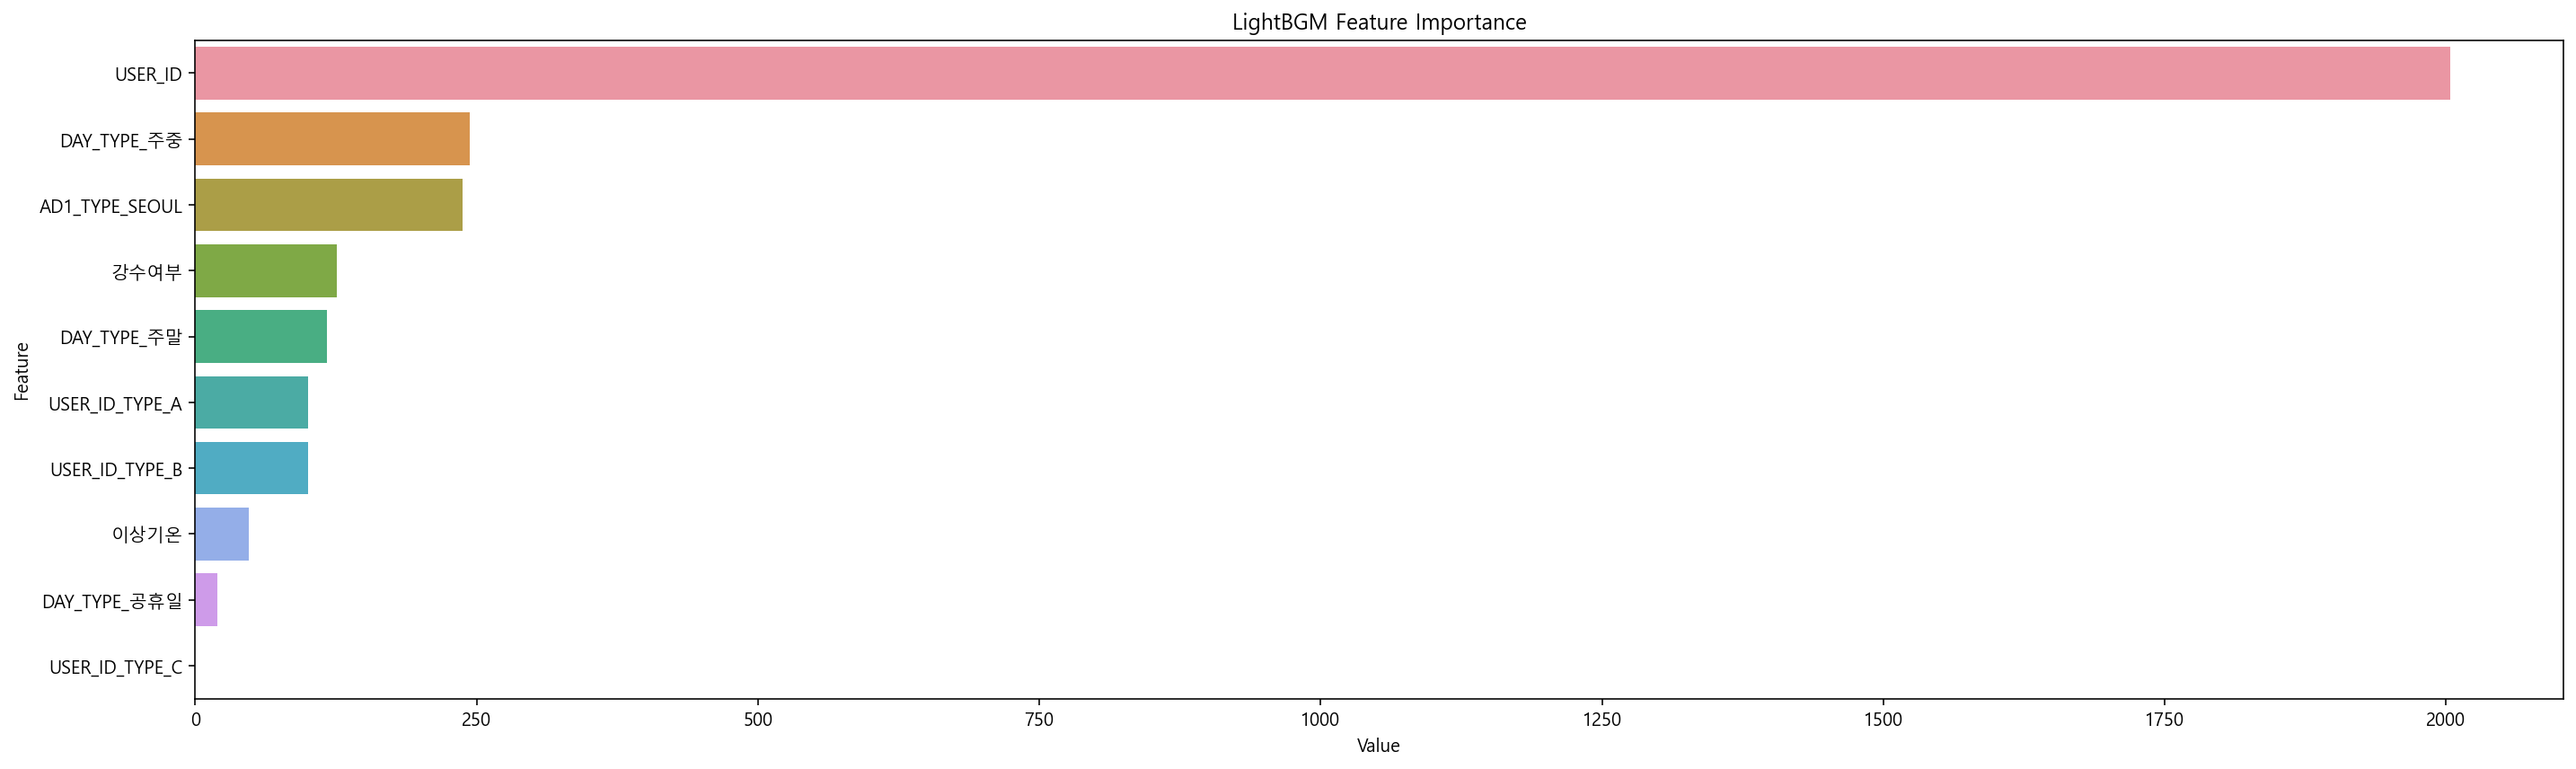

In [100]:
# Feature importance
feature_imp = pd.DataFrame(sorted(zip(model1.feature_importances_,train_x1.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightBGM Feature Importance')
plt.tight_layout()
plt.show()

## 4.2. 이용자 별 한달단위 이용 횟수 예측 모델링

### 4.2.1. 피쳐 엔지니어링

In [101]:
#실전db데이터
df_db=pd.read_csv('./data/실전db.csv', encoding='cp949')
#기상데이터
df_w=pd.read_csv('./data/서울시_기상데이터.csv', encoding='cp949')

In [102]:
# 이상치(일반적인 이용자라고 추정할 수 없는 USER_ID) 제거
df_db=df_db[df_db["USER_ID"] != 999665]
df_db=df_db.reset_index()
df_db.drop(['index'], axis=1, inplace=True)

In [103]:
# JOIN_DATE와 DATE는 datetime 형태로 바꾼다
df_db.JOIN_DATE = pd.to_datetime(df_db.JOIN_DATE) 
df_db.DATE = pd.to_datetime(df_db.DATE)

In [104]:
# JOIN_DATE는 년도로 바꾼다.
df_db.JOIN_DATE = df_db.JOIN_DATE.dt.to_period(freq="A") # 나중에 원핫인코딩으로 바꾸자.
df_db.JOIN_DATE = df_db.JOIN_DATE.astype(str)

In [105]:
# DATE는 월별로 묶어서 새로운 컬럼을 생성
df_db["MONTH"] = df_db.DATE.dt.strftime('%m')

In [106]:
# DAY_TYPE별 컬럼 만들기
holiday_list = ['2020-01-01','2020-01-24','2020-01-25','2020-01-26','2020-01-27','2020-03-01',
                '2020-05-05','2020-04-15','2020-04-30','2020-06-06','2020-08-15','2020-09-30','2020-10-01',
                '2020-10-02','2020-10-03','2020-10-09','2020-12-25']
# 보다 빠른 계산을 위해 값 변환보다 list를 column으로 선언하는 방법 사용
day_type_list = []
for z in range(len(df_db)) :
    if df_db['DATE'].loc[z].strftime('%Y-%m-%d') in holiday_list :
        day_type_list.append('공휴일') 
    elif df_db['DATE'].loc[z].weekday() > 4 :
        day_type_list.append('주말')
    else :
        day_type_list.append('주중')  
df_db['DAY_TYPE'] = day_type_list
# DAY TYPE별 분류
df_day_0= df_db[df_db['DAY_TYPE']=='주말']
df_day_1= df_db[df_db['DAY_TYPE']=='공휴일']
df_day_2= df_db[df_db['DAY_TYPE']=='주중']

In [107]:
# Feature에 제외되는 컬럼 제거
df_db=df_db.drop(['STORE_ID'], axis=1)

In [108]:
# AD1 중 서울 내 지점 추정
# AD1 중 서울 내 지점 추정
seoul = """
1.종로구, JR
2. 중구, J
3.용산구, YO
4 성동구,SOD
5광진구,GJ
6동대문구, DM
7.중랑구, JRR
8.성북구, SB
9.강북구, GB
10.도봉구, DB
11. 노원구, NW
12.은평구, EP
13.서대문구, SD
14.마포구, MP
15.양천구, YC
16.강서구, GS
17.구로구, GR
18. 금천구, GHN
19.영등포구,YD
20.동작구, DJ
21. 관악구, GW
22.서초구, SC
23.강남구,GN
24. 송파구, SP
25.강동구 GD"""
# AD1 코드 추출
seoul = re.sub("[0-9.,가-힣 ]", "", seoul).split()
ad1_type_list = []
for k in range(len(df_db)) :
    if df_db['AD1'].loc[k] in seoul :
         ad1_type_list.append('SEOUL')
    else :
         ad1_type_list.append('NOT_SEOUL')
df_db['AD1_TYPE'] = ad1_type_list

In [109]:
#USER_ID별 COUNT의 COUNT값
df_uc=df_db[['USER_ID','COUNT']]
df_ucc=df_uc.groupby('USER_ID').count().reset_index()
df_ucc.rename(columns={'COUNT':'COUNTS'},inplace=True)
#USER_ID별 COUNT의 MAX값
df_uc=df_db[['USER_ID','COUNT']]
df_ucmax=df_uc.groupby('USER_ID').max().reset_index()
df_ucmax.rename(columns={'COUNT':'MAX_COUNT'},inplace=True)
#USER_ID별 COUNT의 MEAN값
df_uc=df_db[['USER_ID','COUNT']]
df_ucmean=df_uc.groupby('USER_ID').mean().reset_index()
df_ucmean.rename(columns={'COUNT':'MEAN_COUNT'},inplace=True)
#USER_ID별 COUNT으 COUNT,MAX,MEAN값 
df_ucm=pd.merge(df_ucmean,df_ucmax)
df_ucm=pd.merge(df_ucm,df_ucc)
#USER_TYPE 컬럼 기준에 따라 생성
df_ucm_not1=df_ucm[df_ucm.MAX_COUNT!=1]
df_ucm_1=df_ucm[df_ucm.MAX_COUNT==1]
df_ucm_1=df_ucm[df_ucm['MEAN_COUNT']==1]
df_ucm_1['USER_ID_TYPE']='A'
df_ucm_1=df_ucm_1[['USER_ID','USER_ID_TYPE']]
df_ucm_2=df_ucm[(df_ucm['MEAN_COUNT']>=3) & (df_ucm['COUNTS']>=2)]
df_ucm_2['USER_ID_TYPE']='B'
df_ucm_2=df_ucm_2[['USER_ID','USER_ID_TYPE']]
df_ucm_3=df_ucm[df_ucm['MEAN_COUNT']!=1]
df_ucm_3=df_ucm_3[(df_ucm_3['MEAN_COUNT']<3) | (df_ucm_3['COUNTS']==1)]
df_ucm_3['USER_ID_TYPE']='C'
df_ucm_3=df_ucm_3[['USER_ID','USER_ID_TYPE']]
df_ucm_3
df_ut=pd.concat([df_ucm_1,df_ucm_2,df_ucm_3])

In [110]:
df_db=pd.merge(df_db,df_ut,on='USER_ID')
df_db=pd.get_dummies(df_db,columns={'USER_ID_TYPE'})

In [111]:
# 카테고리값을 One_hot_encoding
df_db=pd.get_dummies(df_db,columns=['JOIN_DATE','DAY_TYPE','AD1_TYPE','D_TYPE','GOODS_TYPE'])

In [112]:
# Feature에 제외되는 컬럼 제거
df_db=df_db.drop(['AD1','AD1_TYPE_NOT_SEOUL'],axis=1)

In [113]:
df_db

,USER_ID,DATE,COUNT,MONTH,USER_ID_TYPE_A,USER_ID_TYPE_B,USER_ID_TYPE_C,JOIN_DATE_1970,JOIN_DATE_2013,JOIN_DATE_2014,JOIN_DATE_2015,JOIN_DATE_2016,JOIN_DATE_2017,JOIN_DATE_2018,JOIN_DATE_2019,JOIN_DATE_2020,DAY_TYPE_공휴일,DAY_TYPE_주말,DAY_TYPE_주중,AD1_TYPE_SEOUL,D_TYPE_AA,D_TYPE_BB,D_TYPE_CC,GOODS_TYPE_A,GOODS_TYPE_B,GOODS_TYPE_C,GOODS_TYPE_D
0,2858,2020-01-01,1,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
1,5647,2020-01-01,1,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
2,5647,2020-02-10,1,02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0
3,33314,2020-01-01,1,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
4,33314,2020-05-01,1,05,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878900,1830551,2020-12-31,1,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
878901,1830570,2020-12-31,1,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
878902,1830580,2020-12-31,1,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0
878903,1830589,2020-12-31,1,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [114]:
# 기상청 센서 기준 NaN 값은 0으로 판단
df_w=df_w.fillna(0)
# 일시 컬럼을 일자와 시간으로 분리 
df_w['일자']=0
for i in range(len(df_w)):
    df_w['일자'][i] = df_w['일시'].iloc[i][:10]
    df_w['시간'] = 0
for i in range(len(df_w)):
    df_w['시간'][i] = df_w['일시'].iloc[i][11:]
#컬럼정리 
df_w = df_w[['일시','일자','시간', '기온','강수량','적설량']]
# datetime 형식으로 자료형 바꿔주기
df_w['일자'] = pd.to_datetime(df_w['일자'])
# 요일 컬럼 넣어주기 (월요일:0 ~ 일요일:6)
# 주말(토,일)은 5,6
df_w['요일'] = df_w['일자'].dt.weekday
# 공휴일은 주말로 바꿔주기
holiday_list = ['2020-01-01','2020-01-24','2020-01-25','2020-01-26','2020-01-27', 
                '2020-03-01','2020-05-05','2020-04-15','2020-04-30','2020-06-06', 
                '2020-08-15','2020-09-30','2020-10-01','2020-10-02','2020-10-03', 
                '2020-10-09','2020-12-25']
for zz in range(len(df_w)) :
    if df_w['일자'].loc[zz].strftime('%Y-%m-%d') in holiday_list :
        df_w['요일'].loc[zz] = 6

In [115]:
# 평일
weekday = df_w[(df_w['요일'] != 5) & (df_w['요일'] != 6)]
# 주중에는 오전 7시로 선택 
weekday = weekday[(weekday['시간']=='7:00')]
# 강수여부 컬럼 생성
weekday['강수여부'] = 0
for i in range(len(weekday)):
    if weekday['강수량'].iloc[i] > 0.0:
        weekday['강수여부'].iloc[i] = 1
    if weekday['적설량'].iloc[i] > 0.0:
        weekday['강수여부'].iloc[i] = 1

In [116]:
# 주말
weekend = df_w[(df_w['요일'] == 5) | (df_w['요일'] == 6)]
# 주말에는 12시 기준으로 선택
weekend = weekend[(weekend['시간']=='12:00')]
# 강수여부 컬럼 생성
weekend['강수여부'] = 0
for i in range(len(weekend)):
    if weekend['강수량'].iloc[i] != 0.0:
        weekend['강수여부'].iloc[i] = 1
    if weekend['적설량'].iloc[i] != 0.0:
        weekend['강수여부'].iloc[i] = 1

In [117]:
# 주중 주말 합쳐서 하나의 데이터프레임 만들기
everyday = pd.concat([weekday, weekend], ignore_index=True )
everyday.sort_values(by=['일자'], axis=0, inplace=True, ignore_index=True)
raining_day = everyday[['일자', '강수여부']]

In [118]:
# 폭염과 한파 
temperatures = df_w[(df_w['기온'] > 33) | (df_w['기온'] < -12)]
day = list(temperatures['일자'].unique())
# 이상 기온 여부 구분
everyday['이상기온'] =0 
for i in range(len(everyday)):
    if everyday['일자'].iloc[i] in day:
        everyday['이상기온'].iloc[i] = 1   
# 최종 강수여부, 이상기온 여부 데이터프레임
weather_col=everyday[['일자', '강수여부','이상기온']]
# 마지막 누락된 데이터 추가
weather_col.loc[365] = ['2020-12-31 00:00:00', 0, 1]
weather_col['일자'] = pd.to_datetime(weather_col['일자'])

In [119]:
#최종 데이터셋(Features)확보
df_final=pd.merge(df_db,weather_col,how='outer',left_on='DATE',right_on='일자')

In [120]:
#컬럼명 수정
df_final.rename(columns={'USER_ID_TYPE_A':'USER_A'},inplace=True)
df_final.rename(columns={'USER_ID_TYPE_B':'USER_B'},inplace=True)
df_final.rename(columns={'USER_ID_TYPE_C':'USER_C'},inplace=True)
df_final.rename(columns={'JOIN_DATE_1970':'1970'},inplace=True)
df_final.rename(columns={'JOIN_DATE_2013':'2013'},inplace=True)
df_final.rename(columns={'JOIN_DATE_2014':'2014'},inplace=True)
df_final.rename(columns={'JOIN_DATE_2015':'2015'},inplace=True)
df_final.rename(columns={'JOIN_DATE_2016':'2016'},inplace=True)
df_final.rename(columns={'JOIN_DATE_2017':'2017'},inplace=True)
df_final.rename(columns={'JOIN_DATE_2018':'2018'},inplace=True)
df_final.rename(columns={'JOIN_DATE_2019':'2019'},inplace=True)
df_final.rename(columns={'JOIN_DATE_2020':'2020'},inplace=True)
df_final.rename(columns={'DAY_TYPE_공휴일':'공휴일'},inplace=True)
df_final.rename(columns={'DAY_TYPE_주말':'주말'},inplace=True)
df_final.rename(columns={'DAY_TYPE_주중':'주중'},inplace=True)
df_final.rename(columns={'AD1_TYPE_SEOUL':'SEOUL'},inplace=True)
df_final.rename(columns={'D_TYPE_AA':'D_AA'},inplace=True)
df_final.rename(columns={'D_TYPE_BB':'D_BB'},inplace=True)
df_final.rename(columns={'D_TYPE_CC':'D_CC'},inplace=True)
df_final.rename(columns={'GOODS_TYPE_A':'GOODS_A'},inplace=True)
df_final.rename(columns={'GOODS_TYPE_B':'GOODS_B'},inplace=True)
df_final.rename(columns={'GOODS_TYPE_C':'GOODS_C'},inplace=True)
df_final.rename(columns={'GOODS_TYPE_D':'GOODS_D'},inplace=True)

In [121]:
df_final

,USER_ID,DATE,COUNT,MONTH,USER_A,USER_B,USER_C,1970,2013,2014,2015,2016,2017,2018,2019,2020,공휴일,주말,주중,SEOUL,D_AA,D_BB,D_CC,GOODS_A,GOODS_B,GOODS_C,GOODS_D,일자,강수여부,이상기온
0,2858,2020-01-01,1,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,2020-01-01,1,0
1,5647,2020-01-01,1,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,2020-01-01,1,0
2,33314,2020-01-01,1,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,2020-01-01,1,0
3,37001,2020-01-01,1,01,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,2020-01-01,1,0
4,37819,2020-01-01,1,01,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,2020-01-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878900,1817598,2020-12-18,1,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,2020-12-18,1,0
878901,1817640,2020-12-18,1,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,2020-12-18,1,0
878902,1817751,2020-12-18,1,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,2020-12-18,1,0
878903,1817805,2020-12-18,1,12,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,2020-12-18,1,0


In [122]:
#날짜기준 train data set, test data set 분리
df_final.sort_values(by='DATE',ascending=True,inplace=True)
df_final.reset_index(inplace=True)
df_final.drop(['index'],axis=1,inplace=True)
df_train_tem=df_final.loc[:623304]
df_test_tem=df_final.loc[623305:]

In [123]:
#train data set 전처리
#고유값 가지는 컬럼들 추출
df_train1=df_train_tem.drop(['DATE','MONTH','COUNT','공휴일','주말','주중','강수여부','이상기온','일자',
                            'D_AA','D_BB','D_CC','GOODS_A','GOODS_B','GOODS_C','GOODS_D'],axis=1)
df_train1=df_train1.drop_duplicates(['USER_ID'])
df_train1

,USER_ID,USER_A,USER_B,USER_C,1970,2013,2014,2015,2016,2017,2018,2019,2020,SEOUL
0,2858,1,0,0,0,0,1,0,0,0,0,0,0,1
1,1281265,0,0,1,0,0,0,0,0,0,0,1,0,1
2,1282132,1,0,0,0,0,0,0,0,0,0,1,0,1
3,1282708,1,0,0,0,0,0,0,0,0,0,1,0,1
4,1284035,1,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622663,1449495,1,0,0,0,0,0,0,0,0,0,1,0,1
622664,1480621,1,0,0,0,0,0,0,0,0,0,0,1,1
622881,1709950,0,0,1,0,0,0,0,0,0,0,0,1,1
623303,1709952,1,0,0,0,0,0,0,0,0,0,0,1,1


In [124]:
#train data set 전처리
#월별 합산값 가지는 컬럼들 추출
df_train2=df_train_tem[['MONTH','COUNT','공휴일','주말','주중','강수여부','이상기온','USER_ID',
                        'D_AA','D_BB','D_CC','GOODS_A','GOODS_B','GOODS_C','GOODS_D']]
df_train2=df_train2.groupby(['USER_ID','MONTH']).sum()
df_train2=df_train2.reset_index()
df_train2

,USER_ID,MONTH,COUNT,공휴일,주말,주중,강수여부,이상기온,D_AA,D_BB,D_CC,GOODS_A,GOODS_B,GOODS_C,GOODS_D
0,224,01,1,0,1,0,0,0,1,0,0,1,0,0,0
1,232,01,4,2,1,1,1,0,0,4,0,1,0,3,0
2,232,02,2,0,1,1,0,0,0,2,0,1,0,1,0
3,232,03,2,1,1,0,0,0,0,2,0,1,0,1,0
4,232,04,4,1,2,0,0,0,0,3,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267262,1709914,09,1,1,0,0,0,0,0,1,0,0,1,0,0
267263,1709935,09,1,1,0,0,0,0,1,0,0,0,1,0,0
267264,1709942,09,1,1,0,0,0,0,1,0,0,0,1,0,0
267265,1709950,09,2,1,0,0,0,0,0,1,0,1,0,0,0


In [125]:
#train data set 전처리
df_train=pd.merge(df_train1,df_train2)
df_train

,USER_ID,USER_A,USER_B,USER_C,1970,2013,2014,2015,2016,2017,2018,2019,2020,SEOUL,MONTH,COUNT,공휴일,주말,주중,강수여부,이상기온,D_AA,D_BB,D_CC,GOODS_A,GOODS_B,GOODS_C,GOODS_D
0,2858,1,0,0,0,0,1,0,0,0,0,0,0,1,01,1,1,0,0,1,0,1,0,0,1,0,0,0
1,1281265,0,0,1,0,0,0,0,0,0,0,1,0,1,01,7,1,3,3,1,0,7,0,0,7,0,0,0
2,1281265,0,0,1,0,0,0,0,0,0,0,1,0,1,03,20,0,0,19,0,0,19,0,0,19,0,0,0
3,1281265,0,0,1,0,0,0,0,0,0,0,1,0,1,04,21,0,1,19,1,0,20,0,0,19,0,1,0
4,1281265,0,0,1,0,0,0,0,0,0,0,1,0,1,05,19,0,1,18,2,0,19,0,0,19,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267262,1449495,1,0,0,0,0,0,0,0,0,0,1,0,1,09,1,1,0,0,0,0,1,0,0,1,0,0,0
267263,1480621,1,0,0,0,0,0,0,0,0,0,0,1,1,09,1,1,0,0,0,0,1,0,0,1,0,0,0
267264,1709950,0,0,1,0,0,0,0,0,0,0,0,1,1,09,2,1,0,0,0,0,0,1,0,1,0,0,0
267265,1709952,1,0,0,0,0,0,0,0,0,0,0,1,1,09,1,1,0,0,0,0,1,0,0,1,0,0,0


In [126]:
#train data set 전처리
#min-max 정규화 함수
def mmnorm(s):
    return (s - s.min()) / ( s.max() - s.min())

In [127]:
#train data set 전처리
#정규화
df_train['공휴일']=mmnorm(df_train[['공휴일']])
df_train['주말']=mmnorm(df_train[['주말']])
df_train['주중']=mmnorm(df_train[['주중']])
df_train['강수여부']=mmnorm(df_train[['강수여부']])
df_train['이상기온']=mmnorm(df_train[['이상기온']])
df_train['D_AA']=mmnorm(df_train[['D_AA']])
df_train['D_BB']=mmnorm(df_train[['D_BB']])
df_train['D_CC']=mmnorm(df_train[['D_CC']])
df_train['GOODS_A']=mmnorm(df_train[['GOODS_A']])
df_train['GOODS_B']=mmnorm(df_train[['GOODS_B']])
df_train['GOODS_C']=mmnorm(df_train[['GOODS_C']])
df_train['GOODS_D']=mmnorm(df_train[['GOODS_D']])

In [128]:
#train data set 전처리
df_train=df_train[['USER_A','USER_B','USER_C',
                 '1970','2013','2014','2015','2016','2017','2018','2019','2020',
                'SEOUL','주중','주말','공휴일','이상기온','강수여부',
                   'D_AA','D_BB','D_CC','GOODS_A','GOODS_B','GOODS_C','COUNT']]
df_train_x=df_train.drop(['COUNT'],axis=1)
df_train_y=df_train['COUNT']

In [129]:
#test data set 전처리
#고유값 가지는 컬럼들 추출
df_test1=df_test_tem.drop(['DATE','MONTH','COUNT','공휴일','주말','주중','강수여부','이상기온','일자',
                            'D_AA','D_BB','D_CC','GOODS_A','GOODS_B','GOODS_C','GOODS_D'],axis=1)
df_test1=df_test1.drop_duplicates(['USER_ID'])
df_test1

,USER_ID,USER_A,USER_B,USER_C,1970,2013,2014,2015,2016,2017,2018,2019,2020,SEOUL
623305,1589466,1,0,0,0,0,0,0,0,0,0,0,1,1
623306,1557160,1,0,0,0,0,0,0,0,0,0,0,1,1
623307,1557070,1,0,0,0,0,0,0,0,0,0,0,1,1
623308,1555326,1,0,0,0,0,0,0,0,0,0,0,1,0
623309,1013267,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878402,808499,1,0,0,0,0,0,0,0,0,1,0,0,1
878461,864552,1,0,0,0,0,0,0,0,0,1,0,0,1
878469,1401244,1,0,0,0,0,0,0,0,0,0,1,0,1
878513,1361675,0,0,1,0,0,0,0,0,0,0,1,0,1


In [130]:
#test data set 전처리
#월별 합산값 가지는 컬럼들 추출
df_test2=df_test_tem[['MONTH','COUNT','공휴일','주말','주중','강수여부','이상기온','USER_ID',
                        'D_AA','D_BB','D_CC','GOODS_A','GOODS_B','GOODS_C','GOODS_D']]
df_test2=df_test2.groupby(['USER_ID','MONTH']).sum()
df_test2=df_test2.reset_index()
df_test2

,USER_ID,MONTH,COUNT,공휴일,주말,주중,강수여부,이상기온,D_AA,D_BB,D_CC,GOODS_A,GOODS_B,GOODS_C,GOODS_D
0,224,12,1,0,0,1,0,0,1,0,0,0,0,1,0
1,232,10,2,1,0,1,0,0,0,2,0,1,1,0,0
2,232,11,2,0,0,2,0,0,0,2,0,2,0,0,0
3,342,10,1,0,1,0,0,0,1,0,0,1,0,0,0
4,565,11,1,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108145,1830551,12,1,0,0,1,0,1,0,1,0,0,1,0,0
108146,1830570,12,1,0,0,1,0,1,0,1,0,0,1,0,0
108147,1830580,12,1,0,0,1,0,1,1,0,0,0,1,0,0
108148,1830589,12,1,0,0,1,0,1,0,1,0,0,1,0,0


In [131]:
#test data set 전처리
df_test=pd.merge(df_test1,df_test2)
df_test

,USER_ID,USER_A,USER_B,USER_C,1970,2013,2014,2015,2016,2017,2018,2019,2020,SEOUL,MONTH,COUNT,공휴일,주말,주중,강수여부,이상기온,D_AA,D_BB,D_CC,GOODS_A,GOODS_B,GOODS_C,GOODS_D
0,1589466,1,0,0,0,0,0,0,0,0,0,0,1,1,10,1,1,0,0,0,0,1,0,0,0,0,1,0
1,1589466,1,0,0,0,0,0,0,0,0,0,0,1,1,11,1,0,1,0,0,0,1,0,0,0,0,1,0
2,1589466,1,0,0,0,0,0,0,0,0,0,0,1,1,12,1,0,1,0,0,0,1,0,0,0,0,1,0
3,1557160,1,0,0,0,0,0,0,0,0,0,0,1,1,10,2,2,0,0,0,0,2,0,0,2,0,0,0
4,1557070,1,0,0,0,0,0,0,0,0,0,0,1,1,10,2,1,0,1,0,0,0,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108145,808499,1,0,0,0,0,0,0,0,0,1,0,0,1,12,1,0,0,1,0,1,0,1,0,1,0,0,0
108146,864552,1,0,0,0,0,0,0,0,0,1,0,0,1,12,1,0,0,1,0,1,1,0,0,1,0,0,0
108147,1401244,1,0,0,0,0,0,0,0,0,0,1,0,1,12,1,0,0,1,0,1,1,0,0,0,0,1,0
108148,1361675,0,0,1,0,0,0,0,0,0,0,1,0,1,12,1,0,0,1,0,1,0,1,0,1,0,0,0


In [132]:
#test data set 전처리
#min-max 정규화 함수
def mmnorm(s):
    return (s - s.min()) / ( s.max() - s.min())

In [133]:
#test data set 전처리
#정규화
df_test['공휴일']=mmnorm(df_test[['공휴일']])
df_test['주말']=mmnorm(df_test[['주말']])
df_test['주중']=mmnorm(df_test[['주중']])
df_test['강수여부']=mmnorm(df_test[['강수여부']])
df_test['이상기온']=mmnorm(df_test[['이상기온']])
df_test['D_AA']=mmnorm(df_test[['D_AA']])
df_test['D_BB']=mmnorm(df_test[['D_BB']])
df_test['D_CC']=mmnorm(df_test[['D_CC']])
df_test['GOODS_A']=mmnorm(df_test[['GOODS_A']])
df_test['GOODS_B']=mmnorm(df_test[['GOODS_B']])
df_test['GOODS_C']=mmnorm(df_test[['GOODS_C']])
df_test['GOODS_D']=mmnorm(df_test[['GOODS_D']])

In [134]:
#test data set 전처리
df_test=df_test[['USER_A','USER_B','USER_C',
                 '1970','2013','2014','2015','2016','2017','2018','2019','2020',
                'SEOUL','주중','주말','공휴일','이상기온','강수여부',
                   'D_AA','D_BB','D_CC','GOODS_A','GOODS_B','GOODS_C','COUNT']]
df_test_x=df_test.drop(['COUNT'],axis=1)
df_test_y=df_test['COUNT']

In [135]:
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(267267, 24)
(267267,)
(108150, 24)
(108150,)


### 4.2.1. 모델 수립

In [136]:
#random seed 설정
np.random.seed(42)

In [137]:
#랜덤포레스트
rf = RandomForestRegressor()
rf.fit(df_train_x,df_train_y)

#gboost
gb=GradientBoostingRegressor()
gb.fit(df_train_x,df_train_y)

#lightgbm
lg=LGBMRegressor()
lg.fit(df_train_x,df_train_y)

LGBMRegressor()

In [138]:
rf_y_pred=rf.predict(df_test_x)
print("rf mse :",mean_squared_error(df_test_y,rf_y_pred))
print("rf mae :",mean_absolute_error(df_test_y,rf_y_pred))
gb_y_pred=gb.predict(df_test_x)
print("gb mse :",mean_squared_error(df_test_y,gb_y_pred))
print("gb mae :",mean_absolute_error(df_test_y,gb_y_pred))
lg_y_pred=lg.predict(df_test_x)
print("lg mse :",mean_squared_error(df_test_y,lg_y_pred))
print("lg mae :",mean_absolute_error(df_test_y,lg_y_pred))

rf mse : 0.3719841068114661
rf mae : 0.10656131371471773
gb mse : 0.2726050247630921
gb mae : 0.12493188245452637
lg mse : 0.26389459776750673
lg mae : 0.10399234125248175


>**lightgbm regressor()이 가장 좋은 수치를 보여줌**

In [139]:
# 파라미터 범위
param_grid = {'n_estimators': [10, 30, 50],'max_depth': [10, 20],'learning_rate' : [0.05],'num_iterations' : [100,200],}
# 모델 준비 (LGBMRegressor)
lg_model = LGBMRegressor()

In [140]:
# GridSearch로 가장 좋은 파라미터 찾기
GCV = GridSearchCV(lg_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=5)
# 모델 fitting
GCV.fit(df_train_x, df_train_y)
# 가장 좋은 파라미터 찾기
print("Best Param :", GCV.best_params_)
# 가장 좋은 파라미터로 모델 설정
lg_model=GCV.best_estimator_ 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed:  1.5min finished


Best Param : {'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 10, 'num_iterations': 200}


In [141]:
#train data 활용 모델 train
lg_model.fit(df_train_x,df_train_y)

LGBMRegressor(learning_rate=0.05, max_depth=20, n_estimators=10,
              num_iterations=200)

### 4.2.3. 모델 평가

In [142]:
#예측
lg_y_pred=lg_model.predict(df_test_x)
print('최종 mse(lightgbm모델 사용) : ',mean_squared_error(df_test_y,lg_y_pred))
print('최종 mae(lightgbm모델 사용) : ',mean_absolute_error(df_test_y,lg_y_pred))

최종 mse(lightgbm모델 사용) :  0.26355187894719134
최종 mae(lightgbm모델 사용) :  0.10392207522470769


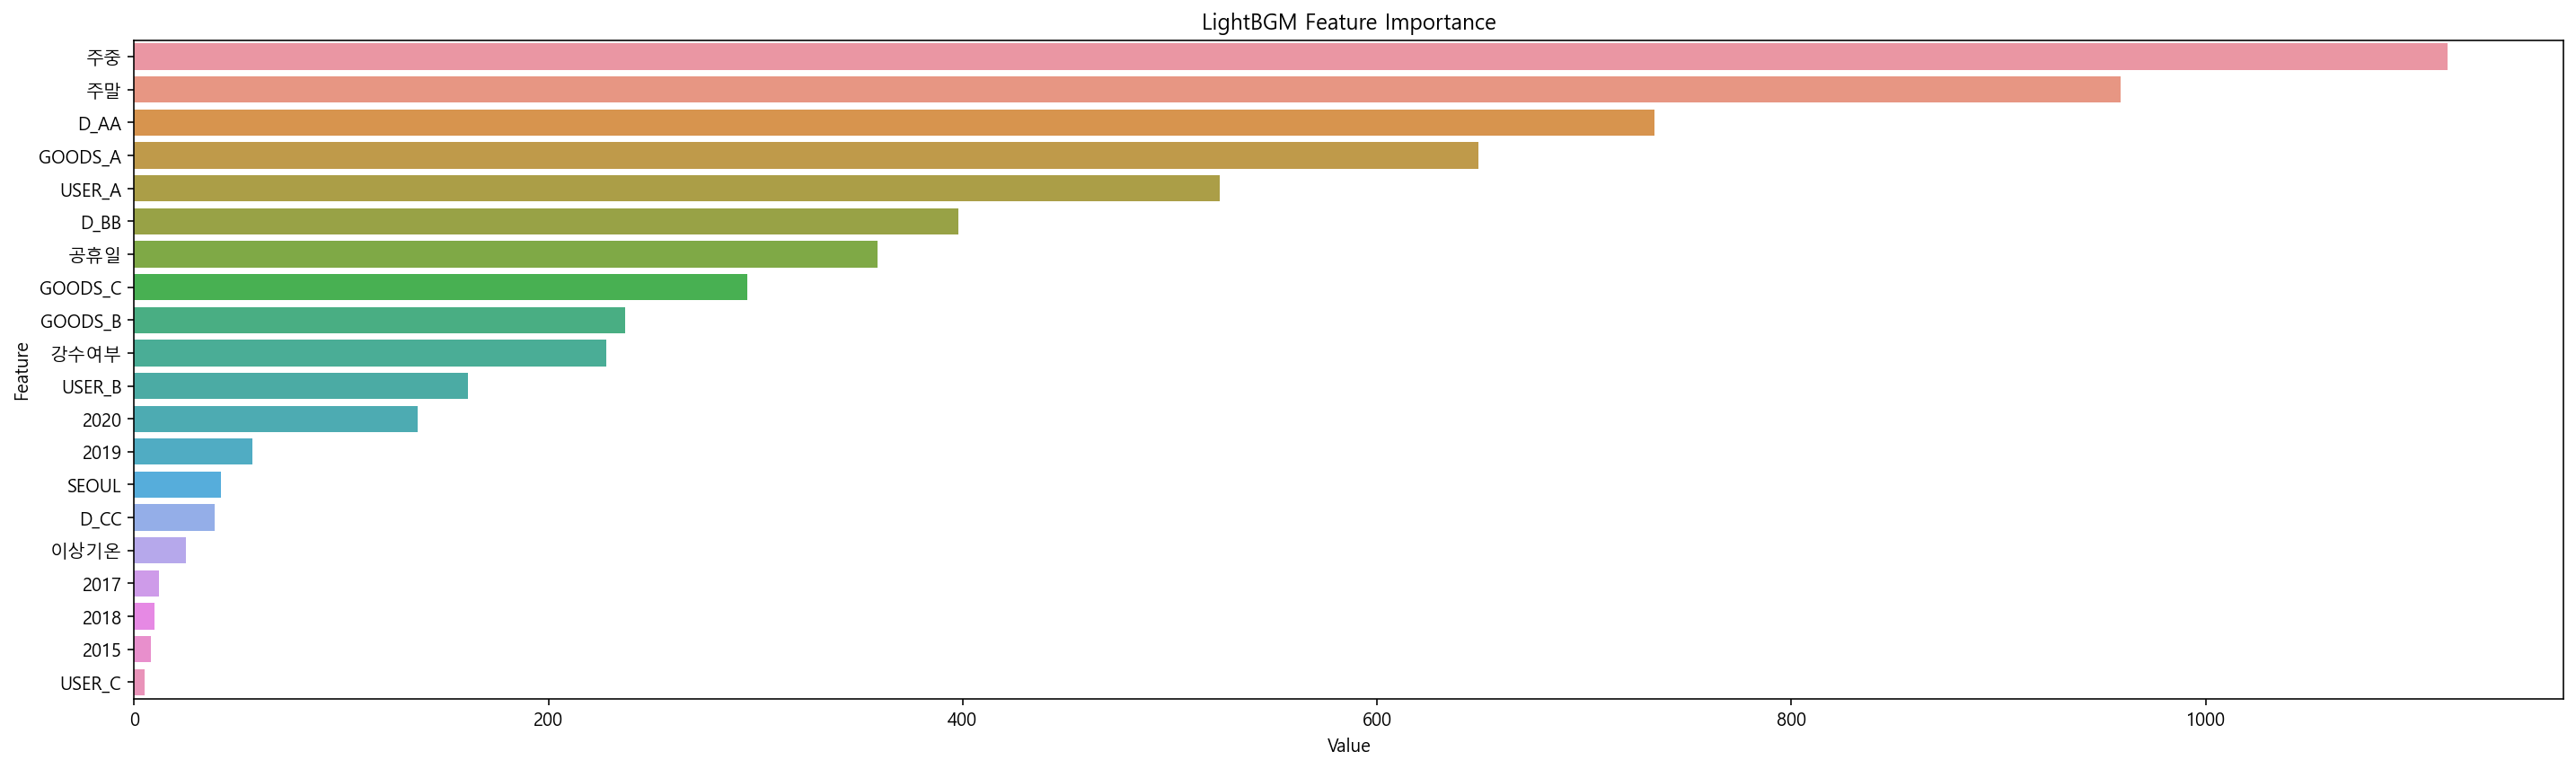

In [143]:
# Feature importance
feature_imp = pd.DataFrame(sorted(zip(lg_model.feature_importances_,df_train_x.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightBGM Feature Importance')
plt.tight_layout()
plt.show()